# Title

#### Student name: Thomas O'Connor
#### Student ID: 05065275


# Introduction

Let's go to the dark side of data. In this assignment, I'm going to explore how the gini coefficient correlates with increases in overall prosperity. Why is this dark you ask? Well, the gini coefficient indicates how unequal in terms of wealth a society is. Capitalism has long been hailed by its ciritics as a format of commerce that generates poor outcomes for poor people. As a society we have pulled more people out of poverty, provided them with basic necessities in a manner that other forms of economics cannot. 

In addition, since we are looking at economic data, I'm going to pull some banking data from the Reserve Bank of New Zealand. 

#### Datasets used:
1. NZ General Social Survey from the late 1980s to 2018. This dataset is supplied, and is missing a lot of data. 
2. Bank interest income data from the Reserve Bank of New Zealand. This is nice clean data

#### Dataset sources: 
1. https://catalogue.data.govt.nz/dataset/new-zealand-general-social-survey
2. https://www.rbnz.govt.nz/statistics/series/registered-banks/banks-summary-income-statement-and-related-ratios

### Research Questions

1. Does an increase in the gini coefficient correlate with better economic outcomes for all? 
2. How does eating breakfast regularly enable emotional stability for children?
3. What does banking, bank interest, bank assets have to do with general inequality?



### Executive Summary

The gini coefficient is correlated with a lot of other data, but doesn't meaningfully affect anything in particular. It has slowly increased in general over time in New Zealand. It is still a useful measure when compared with other countries. When comparing it to other countries we can see how unequal or equal they are in comparison to each other. 

More children not eating breakfast correlated with increased emotional issues in children.




### Importing Libraries

Nothing unusual here, except missngno. This is a standalone python library that allows you to look at missing values, where they are and their frequency. I've also leaned on the lecture series which has set me up well here. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plot
import seaborn as sns
import missingno
import re
import openpyxl
import sklearn
from sklearn.preprocessing import MinMaxScaler

plot.style.use('ggplot')
#pd.options.display.max_columns
pd.options.display.max_rows = 20

In [2]:
from pylab import rcParams #this module gives us some controls over plot rendering attributes
rcParams['figure.figsize'] = 25, 20

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
df = pd.read_csv('../final_dataset/shared_prosperity_assignment_dataset_mangled.csv')

### Having a look at the Dataframe 

This is a reasonably small dataset, with 103 columns and 37 rows of data. Interestingly, there are more attributes than rows. This means we should be mindful that whilst there is a lot of categories of data, there isn't too much depth to it. 

CAVEAT: The attributes could indeed be part of the 'untidyness' of the data. What I mean here is that the attributes could be related to other attributes or give better meaning to them, when combined. 

As seen in the df.head() function there is good mix of missing values, NaaNs, strings, and floats. 

In [5]:
df.shape

(37, 103)

In [5]:
df.head()

Q5:Q1 D10:D1 D10:D1-4(Palma) P90:P10_bhc P80:P20_bhc P80:P50_bhc  \
0  5.09   8.03            1.21        3.87        2.52        1.66   
1  4.46   6.35             1.1        3.43        2.42         1.6   
2  5.94   9.75            1.44        4.26        2.67        1.64   
3  5.51   9.15            1.31        4.17        2.74        1.62   
4   ???    ???             ???         ???         ???         ???   

  P50:P20_bhc GINI-BHC top_10_perc_wealth_share top_5_perc_wealth_share  \
0        0.66     32.2                        -                       -   
1        0.66     30.2                        -                       -   
2        0.62     35.1                        -                       -   
3        0.59     33.4                     55.0                    41.0   
4         ???      ???                        -                       -   

  top_1_perc_wealth_share UN_middle_class_def_inc_share  \
0                       -                          19.9   
1                       -                          21.3   
2                       -                          18.9   
3                    20.0                          19.0   
4                       -                             -   

  OECD_middle_class_def_inc_share LIH_B60_contemp_median_AHC  \
0                            54.9                       19.0   
1               59.50000000000001                       11.0   
2                            57.5                       20.0   
3                            54.6                       20.0   
4                               -                          -   

  LIH_B50_contemp_median_AHC LIH_B50_CV_AHC LIH_B60_CV_AHC  \
0                       13.0           22.0              -   
1                        6.0           10.0              -   
2                       14.0           13.0           18.0   
3                       14.0           17.0           22.0   
4                          -              -              -   

  LIH_B40_contemp_median_AHC LIEH_B60_contemp_median_AHC  \
0                        7.0                         3.0   
1                        4.0                         6.0   
2                        9.0                        11.0   
3                        9.0                         9.0   
4                          -                           -   

  LIEH_B50_contemp_median_AHC LIEH_B50_CV_median_AHC LIEH_B60_CV_median_AHC  \
0                         1.0                    7.0                      -   
1                         2.0                    6.0                      -   
2                         5.0                    5.0                    9.0   
3                         5.0                    6.0                      -   
4                           -                      -                      -   

  LIS65H_B60_CV_median_AHC LISPH_B60_CV_median_AHC LIS65H_B50_CV_median_AHC  \
0                        -                       -        1.363636363636364   
1                        -                       -                      1.5   
2        1.947368421052632       3.210526315789474        2.142857142857143   
3                        -                       -        1.588235294117647   
4                        -                       -                        -   

  LISPH_B50_CV_median_AHC  child_poverty_ahc_perc_HH_B50_CV  \
0       3.272727272727273                              34.0   
1                     2.5                              15.0   
2       3.571428571428572                              18.0   
3       3.235294117647059                              23.0   
4                       -                               NaN   

   child_poverty_ahc_perc_HH_B60_CV  \
0                               NaN   
1                               NaN   
2                              25.0   
3                              31.0   
4                               NaN   

   child_poverty_ahc_perc_HH_B40_contemp_median  \
0                                        

In [6]:
df.tail()

Q5:Q1 D10:D1 D10:D1-4(Palma) P90:P10_bhc P80:P20_bhc P80:P50_bhc  \
32  5.61    9.1            1.36        4.14        2.59        1.62   
33  -1.5    ???             ???         ???         ???         ???   
34   ???    ???             ???         ???         ???         ???   
35   ???    ???             ???         ???         ???         ???   
36  5.42   8.32            1.34        3.91        2.68        1.66   

   P50:P20_bhc GINI-BHC top_10_perc_wealth_share top_5_perc_wealth_share  \
32        0.63     33.8                        -                       -   
33         ???      ???                        -                       -   
34         ???      ???                        -                       -   
35         ???      ???                        -                       -   
36        0.62     33.8                        -                       -   

   top_1_perc_wealth_share UN_middle_class_def_inc_share  \
32                       -                          19.6   
33                       -                             -   
34                       -                             -   
35                       -                             -   
36                       -                          19.2   

   OECD_middle_class_def_inc_share LIH_B60_contemp_median_AHC  \
32                            57.3                       20.0   
33                               -                          -   
34                               -                          -   
35                               -                          -   
36                            53.2                       20.0   

   LIH_B50_contemp_median_AHC LIH_B50_CV_AHC LIH_B60_CV_AHC  \
32                       14.0           11.0           15.0   
33                          -              -              -   
34                          -              -              -   
35                          -              -              -   
36                       13.0           18.0           25.0   

   LIH_B40_contemp_median_AHC LIEH_B60_contemp_median_AHC  \
32                       10.0                        14.0   
33                          -                           -   
34                          -                           -   
35                          -                           -   
36                        8.0                         8.0   

   LIEH_B50_contemp_median_AHC LIEH_B50_CV_median_AHC LIEH_B60_CV_median_AHC  \
32                         7.0                    5.0                    8.0   
33                           -                      -                      -   
34                           -                      -                      -   
35                           -                      -                      -   
36                         3.0                    7.0                      -   

   LIS65H_B60_CV_median_AHC LISPH_B60_CV_median_AHC LIS65H_B50_CV_median_AHC  \
32        2.142857142857143       3.928571428571428        2.454545454545455   
33                        -                       -                        -   
34                        -                       -                        -   
35                        -                       -                        -   
36                        -                       -        1.555555555555556   

   LISPH_B50_CV_median_AHC  child_poverty_ahc_perc_HH_B50_CV  \
32       3.727272727272727                              14.0   
33                       -                               NaN   
34                       -                               NaN   
35                       -                               NaN   
36       3.888888888888889                              28.0   

    child_poverty_ahc_perc_HH_B60_CV  \
32                              20.0   
33                               NaN   
34                               NaN   
35                               NaN   
36                              37.0   

    child_poverty_ahc_perc_HH_B40

So... The below shows what is duplicated in the data for 'year'. Interestingly, there is no duplicate data for year. This means the data per row is per year. Does this mean that the data in each row is unique? Yes it does... This goes against what I was expecting. I was expecting to see data that had been joined on top of each other, this may mean that the data was joined on 'year'. 

What to do from here... I might keep looking at the data at some (hopefully) more obvious double ups. Though I may not find any and will have to move on.

The double ups throughout the dataset are mostly NaaNs. This is a rabbit hole that is unlikely to yeild much insight or results. I will be better off deleting a lot of these attributes and getting insights from the mostly full data that I have. 

I think this dataset doesn't have a massive number of double ups. I think it has a lot of missing data however. 

In [7]:
df.loc[df.duplicated()]

Empty DataFrame
Columns: [Q5:Q1, D10:D1, D10:D1-4(Palma), P90:P10_bhc, P80:P20_bhc, P80:P50_bhc, P50:P20_bhc, GINI-BHC, top_10_perc_wealth_share, top_5_perc_wealth_share, top_1_perc_wealth_share, UN_middle_class_def_inc_share, OECD_middle_class_def_inc_share, LIH_B60_contemp_median_AHC, LIH_B50_contemp_median_AHC, LIH_B50_CV_AHC, LIH_B60_CV_AHC, LIH_B40_contemp_median_AHC, LIEH_B60_contemp_median_AHC, LIEH_B50_contemp_median_AHC, LIEH_B50_CV_median_AHC, LIEH_B60_CV_median_AHC, LIS65H_B60_CV_median_AHC, LISPH_B60_CV_median_AHC, LIS65H_B50_CV_median_AHC, LISPH_B50_CV_median_AHC, child_poverty_ahc_perc_HH_B50_CV, child_poverty_ahc_perc_HH_B60_CV, child_poverty_ahc_perc_HH_B40_contemp_median, child_poverty_ahc_perc_HH_B50_contemp_median, child_poverty_ahc_perc_HH_B60_contemp_median, child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents, child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents, rate_of_personal_insolvencies, loan_delinquency_percent, national_house_rental_A30%_income_spend, national_house_purchasing_A30%_income_spend, national_house_rental_HAM, national_house_purchasing_HAM, home_ownership_rate, homelessness_percentage_of_population, priority_A_state_housing_applicants_as_pop_percent, priority_B_state_housing_applicants_as_pop_percent, debt_servicing_as_percent_of_disp_inc, house_median_multiples, unemployment_rate, 60_64_years_unemp_rate, 65years_and_over_unemp_rate, underemployment_rate, employees_working_long_hours, labour_market_insecurity, long_term_unemployment_rate, pop_15_to_29_NEET, low_pay_percent_OECD_def, low_pay_percent_120percent_MW_def, living_min_wage_gap_magnitude, LIS_ms-16, LP:RPW_ms-16, teriary_education_participation_rate, education_spend_as_percent_of_GDP, education_spend_as_percent_of_total_gov_expenses, median_teriary_loan_as_perc_of_med_inc_AHC, median_teriary_loan_balance_as_perc_of_med_inc_AHC, university_affordability_ratio_to_mean_salary, polytechnics_affordability_ratio_to_mean_salary, wananga_affordability_ratio_to_mean_salary, bachelors_earning_premium_hourly, dips_cert_earning_premium_hourly, school_earning_premium_hourly, bachelors_earning_premium_weekly, dips_cert_earning_premium_weekly, school_earning_premium_weekly, health_expenditure_as_percent_of_gdp, health_expenditure_per_capita_PPP, depression_adult, excellent_very_good_or_good_self_rated_health, psychological_distress_adult, mood_anxiety_disorder_adult, healthy_weight_adult, unmet_after_hours_care_due_to_cost_adult, unmet_GP_care_due_to_cost_adult, veg_and_fruit_intake_adult, breakfast_eaten_at_home_less_5_days_a_week_child, emotional_behavioural_problems_child, adult_diabetes_rates, depression_child, excellent_very_good_or_good_parent_rated_health_child, unfilled_prescription_due_to_cost_child, unmet_need_for_after_hours_due_to_cost_child, unmet_need_for_GP_due_to_cost_child, vegetable_and_fruit_intake_child, healthy_weight_child, suicides_per_100000, problem_gambling_intervention_prevelance_percent, total_prisoners_in_remand_rate, total_sentenced_prisoners_rate, total_post_sentence_offender_population_rate, violent_crime_victimisations_rate, recorded_murders_and_homicides_per_million, regional_gdp_proportional_variation, ...]
Index: []

In [8]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

In [9]:
print(df.columns.tolist())

['Q5:Q1', 'D10:D1', 'D10:D1-4(Palma)', 'P90:P10_bhc', 'P80:P20_bhc', 'P80:P50_bhc', 'P50:P20_bhc', 'GINI-BHC', 'top_10_perc_wealth_share', 'top_5_perc_wealth_share', 'top_1_perc_wealth_share', 'UN_middle_class_def_inc_share', 'OECD_middle_class_def_inc_share', 'LIH_B60_contemp_median_AHC', 'LIH_B50_contemp_median_AHC', 'LIH_B50_CV_AHC', 'LIH_B60_CV_AHC', 'LIH_B40_contemp_median_AHC', 'LIEH_B60_contemp_median_AHC', 'LIEH_B50_contemp_median_AHC', 'LIEH_B50_CV_median_AHC', 'LIEH_B60_CV_median_AHC', 'LIS65H_B60_CV_median_AHC', 'LISPH_B60_CV_median_AHC', 'LIS65H_B50_CV_median_AHC', 'LISPH_B50_CV_median_AHC', 'child_poverty_ahc_perc_HH_B50_CV', 'child_poverty_ahc_perc_HH_B60_CV', 'child_poverty_ahc_perc_HH_B40_contemp_median', 'child_poverty_ahc_perc_HH_B50_contemp_median', 'child_poverty_ahc_perc_HH_B60_contemp_median', 'child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents', 'child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents', 'rate_of_personal_insolvencies', 'loan_

Here we can see that the attributes are made up of floats and objects.  This means that there is only some of the attributes that are solely numbers or missing numbers. The rest are a mix. There is a bunch of floats which is ideal. 

I think the first thing we can do to make some sense of this data is to convert the year column from an object to a datetime. Then I think making the year column the index, then have a better look at the data we have. At first glance, it is a bit of a mess, and it looks like there is a lot missing. 



In [10]:
df.dtypes

Q5:Q1                                                               object
D10:D1                                                              object
D10:D1-4(Palma)                                                     object
P90:P10_bhc                                                         object
P80:P20_bhc                                                         object
P80:P50_bhc                                                         object
P50:P20_bhc                                                         object
GINI-BHC                                                            object
top_10_perc_wealth_share                                            object
top_5_perc_wealth_share                                             object
top_1_perc_wealth_share                                             object
UN_middle_class_def_inc_share                                       object
OECD_middle_class_def_inc_share                                     object
LIH_B60_contemp_median_AH

# Data Wrangling 

#### Back to Front

During my exploratory data analysis I found that I had a lot of data that had a lot of letters in it. Really confused the graphs as the letters were not consistent with anything. Below I have written an iteration that I borrowed off several websites. I realise that the 'coerce' line is a bit untidy, but I spent a long time trying to make it work, failed and resorted to something easy. For the most part it looks like it worked. I have placed the code up here above the change of the year column to a datetime and placing it as an index. I found that if I converted the year to a float, or messed around with that column at all it messed around my dates later when I tried to graph them. 

In [11]:
def convert_to_float_and_remove_letters(df):
    for col in df.columns[:-1]:
        df[col] = df[col].apply(lambda x: re.sub('[^0-9.]', '', x) if isinstance(x, str) else x)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [12]:
df = convert_to_float_and_remove_letters(df)
df.head()

Q5:Q1  D10:D1  D10:D1-4(Palma)  P90:P10_bhc  P80:P20_bhc  P80:P50_bhc  \
0   5.09    8.03             1.21         3.87         2.52         1.66   
1   4.46    6.35             1.10         3.43         2.42         1.60   
2   5.94    9.75             1.44         4.26         2.67         1.64   
3   5.51    9.15             1.31         4.17         2.74         1.62   
4    NaN     NaN              NaN          NaN          NaN          NaN   

   P50:P20_bhc  GINI-BHC  top_10_perc_wealth_share  top_5_perc_wealth_share  \
0         0.66      32.2                       NaN                      NaN   
1         0.66      30.2                       NaN                      NaN   
2         0.62      35.1                       NaN                      NaN   
3         0.59      33.4                      55.0                     41.0   
4          NaN       NaN                       NaN                      NaN   

   top_1_perc_wealth_share  UN_middle_class_def_inc_share  \
0                      NaN                           19.9   
1                      NaN                           21.3   
2                      NaN                           18.9   
3                     20.0                           19.0   
4                      NaN                            NaN   

   OECD_middle_class_def_inc_share  LIH_B60_contemp_median_AHC  \
0                             54.9                        19.0   
1                             59.5                        11.0   
2                             57.5                        20.0   
3                             54.6                        20.0   
4                              NaN                         NaN   

   LIH_B50_contemp_median_AHC  LIH_B50_CV_AHC  LIH_B60_CV_AHC  \
0                        13.0            22.0             NaN   
1                         6.0            10.0             NaN   
2                        14.0            13.0            18.0   
3                        14.0            17.0            22.0   
4                         NaN             NaN             NaN   

   LIH_B40_contemp_median_AHC  LIEH_B60_contemp_median_AHC  \
0                         7.0                          3.0   
1                         4.0                          6.0   
2                         9.0                         11.0   
3                         9.0                          9.0   
4                         NaN                          NaN   

   LIEH_B50_contemp_median_AHC  LIEH_B50_CV_median_AHC  \
0                          1.0                     7.0   
1                          2.0                     6.0   
2                          5.0                     5.0   
3                          5.0                     6.0   
4                          NaN                     NaN   

   LIEH_B60_CV_median_AHC  LIS65H_B60_CV_median_AHC  LISPH_B60_CV_median_AHC  \
0                     NaN                       NaN                      NaN   
1                     NaN                       NaN                      NaN   
2                     9.0                  1.947368                 3.210526   
3                     NaN                       NaN                      NaN   
4                     NaN                       NaN                      NaN   

   LIS65H_B50_CV_median_AHC  LISPH_B50_CV_median_AHC  \
0                  1.363636                 3.272727   
1                  1.500000                 2.500000   
2                  2.142857                 3.571429   
3                  1.588235                 3.235294   
4                       NaN                      NaN   

   child_poverty_ahc_perc_HH_B50_CV  child_poverty_ahc_perc_HH_B60_CV  \
0                              34.0                               NaN   
1                              15.0                               NaN   
2                              18.0                              25.0   
3                              23.0                              31.0   
4          

In [13]:
df.head()

Q5:Q1  D10:D1  D10:D1-4(Palma)  P90:P10_bhc  P80:P20_bhc  P80:P50_bhc  \
0   5.09    8.03             1.21         3.87         2.52         1.66   
1   4.46    6.35             1.10         3.43         2.42         1.60   
2   5.94    9.75             1.44         4.26         2.67         1.64   
3   5.51    9.15             1.31         4.17         2.74         1.62   
4    NaN     NaN              NaN          NaN          NaN          NaN   

   P50:P20_bhc  GINI-BHC  top_10_perc_wealth_share  top_5_perc_wealth_share  \
0         0.66      32.2                       NaN                      NaN   
1         0.66      30.2                       NaN                      NaN   
2         0.62      35.1                       NaN                      NaN   
3         0.59      33.4                      55.0                     41.0   
4          NaN       NaN                       NaN                      NaN   

   top_1_perc_wealth_share  UN_middle_class_def_inc_share  \
0                      NaN                           19.9   
1                      NaN                           21.3   
2                      NaN                           18.9   
3                     20.0                           19.0   
4                      NaN                            NaN   

   OECD_middle_class_def_inc_share  LIH_B60_contemp_median_AHC  \
0                             54.9                        19.0   
1                             59.5                        11.0   
2                             57.5                        20.0   
3                             54.6                        20.0   
4                              NaN                         NaN   

   LIH_B50_contemp_median_AHC  LIH_B50_CV_AHC  LIH_B60_CV_AHC  \
0                        13.0            22.0             NaN   
1                         6.0            10.0             NaN   
2                        14.0            13.0            18.0   
3                        14.0            17.0            22.0   
4                         NaN             NaN             NaN   

   LIH_B40_contemp_median_AHC  LIEH_B60_contemp_median_AHC  \
0                         7.0                          3.0   
1                         4.0                          6.0   
2                         9.0                         11.0   
3                         9.0                          9.0   
4                         NaN                          NaN   

   LIEH_B50_contemp_median_AHC  LIEH_B50_CV_median_AHC  \
0                          1.0                     7.0   
1                          2.0                     6.0   
2                          5.0                     5.0   
3                          5.0                     6.0   
4                          NaN                     NaN   

   LIEH_B60_CV_median_AHC  LIS65H_B60_CV_median_AHC  LISPH_B60_CV_median_AHC  \
0                     NaN                       NaN                      NaN   
1                     NaN                       NaN                      NaN   
2                     9.0                  1.947368                 3.210526   
3                     NaN                       NaN                      NaN   
4                     NaN                       NaN                      NaN   

   LIS65H_B50_CV_median_AHC  LISPH_B50_CV_median_AHC  \
0                  1.363636                 3.272727   
1                  1.500000                 2.500000   
2                  2.142857                 3.571429   
3                  1.588235                 3.235294   
4                       NaN                      NaN   

   child_poverty_ahc_perc_HH_B50_CV  child_poverty_ahc_perc_HH_B60_CV  \
0                              34.0                               NaN   
1                              15.0                               NaN   
2                              18.0                              25.0   
3                              23.0                              31.0   
4          

Here is my attempt to tidy things up for myself by converting the year column to a datetime element and setting that column as the index. 

Beyond that, I converted about half of the column names to something that was less easy to use, but was more intuitive to me. The second half I felt were fairly intuitive and didn't really need changing. I copied and pasted the second half from print(df.columns.tolist()) above. 

In [14]:
df1 = df
df1['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
#df = df.set_index(['year'])

In [15]:

df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
df = df.set_index(['year'])

In [16]:
df.columns=[
        'quintile_prosperity_ratio', 
        'decile_prosperity_ratio', 
        'ratio_highesttolowest',
        '90th_to_10th_income_ratio',
        '80th_to_20th_income_ratio',
        '80th_to_50th_income_ratio',
        '50th_to_20th_income_ratio',
        'gini_coefficient',
        'top10percent_share_wealth',
        'top5percent_share_wealth',
        'top1percent_share_wealth',
        'shareofincome_lowest_deciles',
        'shareofincome_middle_deciles',
        'percentofhouseholds_earningbelow_60percent_medianincome',
        'percentofhouseholds_earningbelow_50percent_medianincome',
        'percentofhouseholds_earningbelow_50percent_median2007income',
        'percentofhouseholds_earningbelow_60percent_median2007income',
        'percentof_households_earningbelow_40percent_medianincome',
        'percentof_elderly_households_earningbelow_60percent_medianincome',
        'percentof_elderly_households_earningbelow_50percent_medianincome',
        'percentof_elderly_households_earningbelow_50percent_median2007income',
        'percentof_elderly_households_earningbelow_60percent_median2007income',
        'povertyriskratio_singleunder65households_earningbelow_60percent_median2007income',
        'povertyriskratio_soloparent_earningbelow_60percent_median2007income',
        'povertyriskratio_singleunder65households_earningbelow_50percent_median2007income',
        'povertyriskratio_soloparent_earningbelow_60percent_median2007income',
        'percentageofchildren_family_earningbelow_50percent_median2007income',
        'percentofchildren_family_earningbelow_60percent_median2007income',
        'percentofchildren_family_earningbelow_40percent_medianincome',
        'percentofchildren_family_earningbelow_50percent_medianincome',
        'percentofchildren_family_earningbelow_60percent_medianincome',
        'percentofchildren_family_earningbelow_60percent_median2007income_oneormoreparttimeworkingparents',
        'percentofchildren_family_earningbelow_60percent_median2007income_oneormorefulltimeworkingparents',
        'percentofinsolvenciesforpopulation',
        'percentofloandelinquincies',
        'percentofhouseholds_spendingmorethan30percentonrent',
        'percentofhouseholds_spendingmorethan30percentonpurchasedhousingcosts',
        'housingaffordabilitymeasure_rentals',
        'housingaffordabilitymeasure_purchased',
        'percentofhomeowners',
        'percentofhomeless',
        'percentof_pri1_statehousingapplicants',
        'percentof_pri2_statehousingapplicants',
        'householddebtservicing_over_nominaldisposableincome',
        'medianhouseprice_to_medianincome',
        'percentunemployed',
        '60to64unemployed',
        '65andoverunemployed',
        'underemploymentrate',
        'percentpeopleworkinglonghours',
        'labour_insecurity',
        'longtermunemployed',
        '15-29notemployedorstudying',
        'percentlowpay',
        'percentlowpay_tominimumwage',
        'minwageoverlivingwagetimespercentonminwage',
        'percentinthesweet16industries',
        'ratiolabourproductivity_towages',
        'teriary_education_participation_rate', 
        'education_spend_as_percent_of_GDP', 
        'education_spend_as_percent_of_total_gov_expenses', 
        'median_teriary_loan_as_perc_of_med_inc_AHC', 
        'median_teriary_loan_balance_as_perc_of_med_inc_AHC', 
        'university_affordability_ratio_to_mean_salary', 
        'polytechnics_affordability_ratio_to_mean_salary', 
        'wananga_affordability_ratio_to_mean_salary', 
        'bachelors_earning_premium_hourly', 
        'dips_cert_earning_premium_hourly', 
        'school_earning_premium_hourly',
        'bachelors_earning_premium_weekly', 
        'dips_cert_earning_premium_weekly', 
        'school_earning_premium_weekly',
        'health_expenditure_as_percent_of_gdp',
        'health_expenditure_per_capita_PPP', 
        'depression_adult', 
        'excellent_very_good_or_good_self_rated_health', 
        'psychological_distress_adult', 
        'mood_anxiety_disorder_adult', 
        'healthy_weight_adult', 
        'unmet_after_hours_care_due_to_cost_adult', 
        'unmet_GP_care_due_to_cost_adult', 
        'veg_and_fruit_intake_adult', 
        'breakfast_eaten_at_home_less_5_days_a_week_child', 
        'emotional_behavioural_problems_child', 
        'adult_diabetes_rates', 
        'depression_child',
        'excellent_very_good_or_good_parent_rated_health_child', 
        'unfilled_prescription_due_to_cost_child', 
        'unmet_need_for_after_hours_due_to_cost_child', 
        'unmet_need_for_GP_due_to_cost_child', 
        'vegetable_and_fruit_intake_child', 
        'healthy_weight_child', 
        'suicides_per_100000', 
        'problem_gambling_intervention_prevelance_percent', 
        'total_prisoners_in_remand_rate', 
        'total_sentenced_prisoners_rate', 
        'total_post_sentence_offender_population_rate', 
        'violent_crime_victimisations_rate', 
        'recorded_murders_and_homicides_per_million', 
        'regional_gdp_proportional_variation', 
        'difference_in_percent_for_low_income_by_gender', 
        'gender_pay_gap'
           ]

In [17]:
df.head()

quintile_prosperity_ratio  decile_prosperity_ratio  \
year                                                             
1994-12-31                       5.09                     8.03   
1990-12-31                       4.46                     6.35   
2011-12-31                       5.94                     9.75   
2004-12-31                       5.51                     9.15   
1987-12-31                        NaN                      NaN   

            ratio_highesttolowest  90th_to_10th_income_ratio  \
year                                                           
1994-12-31                   1.21                       3.87   
1990-12-31                   1.10                       3.43   
2011-12-31                   1.44                       4.26   
2004-12-31                   1.31                       4.17   
1987-12-31                    NaN                        NaN   

            80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
year                                                               
1994-12-31                       2.52                       1.66   
1990-12-31                       2.42                       1.60   
2011-12-31                       2.67                       1.64   
2004-12-31                       2.74                       1.62   
1987-12-31                        NaN                        NaN   

            50th_to_20th_income_ratio  gini_coefficient  \
year                                                      
1994-12-31                       0.66              32.2   
1990-12-31                       0.66              30.2   
2011-12-31                       0.62              35.1   
2004-12-31                       0.59              33.4   
1987-12-31                        NaN               NaN   

            top10percent_share_wealth  top5percent_share_wealth  \
year                                                              
1994-12-31                        NaN                       NaN   
1990-12-31                        NaN                       NaN   
2011-12-31                        NaN                       NaN   
2004-12-31                       55.0                      41.0   
1987-12-31                        NaN                       NaN   

            top1percent_share_wealth  shareofincome_lowest_deciles  \
year                                                                 
1994-12-31                       NaN                          19.9   
1990-12-31                       NaN                          21.3   
2011-12-31                       NaN                          18.9   
2004-12-31                      20.0                          19.0   
1987-12-31                       NaN                           NaN   

            shareofincome_middle_deciles  \
year                                       
1994-12-31                          54.9   
1990-12-31                          59.5   
2011-12-31                          57.5   
2004-12-31                          54.6   
1987-12-31                           NaN   

            percentofhouseholds_earningbelow_60percent_medianincome  \
year                                                                  
1994-12-31                                               19.0         
1990-12-31                                               11.0         
2011-12-31                                               20.0         
2004-12-31                                               20.0         
1987-12-31                                                NaN         

            percentofhouseholds_earningbelow_50percent_medianincome  \
year                                                                  
1994-12-31                                               13.0         
1990-12-31                                                6.0         
2011-12-31                                               14.0         
2004-12-31                                               14.0         
1987-12-31     

In [18]:
df.dtypes.value_counts()

float64    102
dtype: int64

#### Missing Data
A lot of missing data here! Lots of opportunities to fil in missing values, delete them, or find something meaningful to put in there. Worst comes, we don't get any insights from those attributes, and we discard the whole thing. With 37 of them, I'm sure we will be fine, because really, when building a model or using the data to predict anything, the more noise the more inaccurate the model can become. 

#### Missing Data After Conversion to Floats
Many of the NaNs had a letter attached to them. I don't know exactly how this works, but it made the original missingno matrix much more full looking than what you see below. This dataset is more empty than full, whereas when I graphed it previously, there was a lot more black sqaures. The data is still useful, just the the insights over generations might not be accurately or fairly assessed. 

<AxesSubplot:>

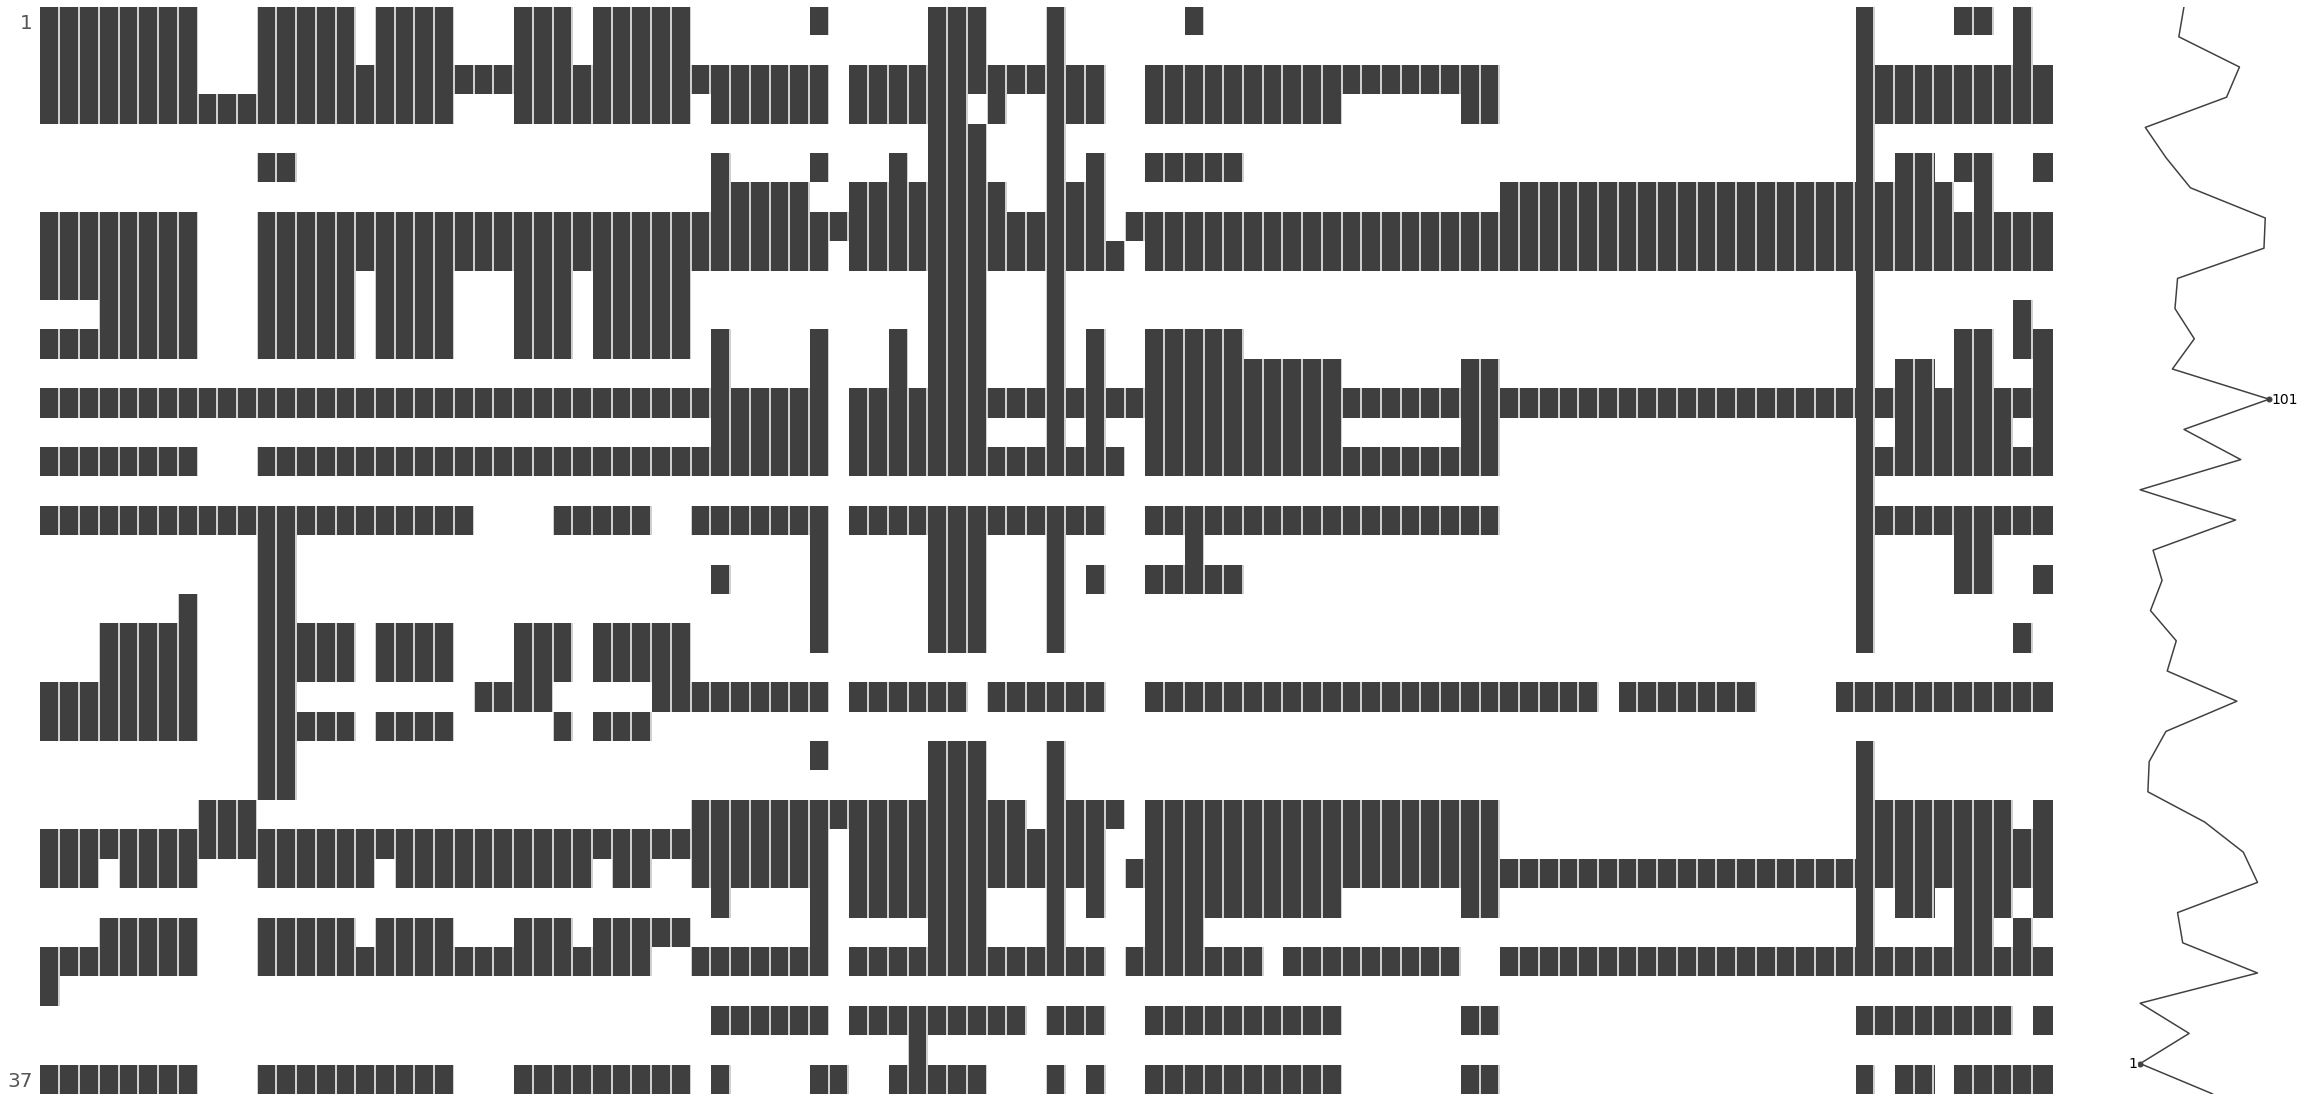

In [19]:
missingno.matrix(df, figsize=(40,20))

### Filling Some Data

#### Fillna Forward Fill

Here we look at filling this missing data with the forward fill method. As there is so much missing data, it is highly likely that the graphical output will be flatline before making the rest of the graph. 

#### Dropna Method

Using the dropna method drops the whole dataframe. This is becuase every row has missing data. This is not as ideal as the forward fill method, or the mean method of filling the missing data. 

#### Fillna Mean Method

This is a great way to fill the missing data, however as there is a lot of missing data, it is unlikely to give very accurate insights to the end user. Making decisions based on this would be problematic. If the end user was government, the media would likely tear this apart. 



In [22]:
df_ffilled = df.fillna(method='ffill')
df_ffilled.head()

quintile_prosperity_ratio  decile_prosperity_ratio  \
year                                                             
1994-12-31                       5.09                     8.03   
1990-12-31                       4.46                     6.35   
2011-12-31                       5.94                     9.75   
2004-12-31                       5.51                     9.15   
1987-12-31                       5.51                     9.15   

            ratio_highesttolowest  90th_to_10th_income_ratio  \
year                                                           
1994-12-31                   1.21                       3.87   
1990-12-31                   1.10                       3.43   
2011-12-31                   1.44                       4.26   
2004-12-31                   1.31                       4.17   
1987-12-31                   1.31                       4.17   

            80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
year                                                               
1994-12-31                       2.52                       1.66   
1990-12-31                       2.42                       1.60   
2011-12-31                       2.67                       1.64   
2004-12-31                       2.74                       1.62   
1987-12-31                       2.74                       1.62   

            50th_to_20th_income_ratio  gini_coefficient  \
year                                                      
1994-12-31                       0.66              32.2   
1990-12-31                       0.66              30.2   
2011-12-31                       0.62              35.1   
2004-12-31                       0.59              33.4   
1987-12-31                       0.59              33.4   

            top10percent_share_wealth  top5percent_share_wealth  \
year                                                              
1994-12-31                        NaN                       NaN   
1990-12-31                        NaN                       NaN   
2011-12-31                        NaN                       NaN   
2004-12-31                       55.0                      41.0   
1987-12-31                       55.0                      41.0   

            top1percent_share_wealth  shareofincome_lowest_deciles  \
year                                                                 
1994-12-31                       NaN                          19.9   
1990-12-31                       NaN                          21.3   
2011-12-31                       NaN                          18.9   
2004-12-31                      20.0                          19.0   
1987-12-31                      20.0                          19.0   

            shareofincome_middle_deciles  \
year                                       
1994-12-31                          54.9   
1990-12-31                          59.5   
2011-12-31                          57.5   
2004-12-31                          54.6   
1987-12-31                          54.6   

            percentofhouseholds_earningbelow_60percent_medianincome  \
year                                                                  
1994-12-31                                               19.0         
1990-12-31                                               11.0         
2011-12-31                                               20.0         
2004-12-31                                               20.0         
1987-12-31                                               20.0         

            percentofhouseholds_earningbelow_50percent_medianincome  \
year                                                                  
1994-12-31                                               13.0         
1990-12-31                                                6.0         
2011-12-31                                               14.0         
2004-12-31                                               14.0         
1987-12-31     

In [21]:
df.dropna()

Empty DataFrame
Columns: [quintile_prosperity_ratio, decile_prosperity_ratio, ratio_highesttolowest, 90th_to_10th_income_ratio, 80th_to_20th_income_ratio, 80th_to_50th_income_ratio, 50th_to_20th_income_ratio, gini_coefficient, top10percent_share_wealth, top5percent_share_wealth, top1percent_share_wealth, shareofincome_lowest_deciles, shareofincome_middle_deciles, percentofhouseholds_earningbelow_60percent_medianincome, percentofhouseholds_earningbelow_50percent_medianincome, percentofhouseholds_earningbelow_50percent_median2007income, percentofhouseholds_earningbelow_60percent_median2007income, percentof_households_earningbelow_40percent_medianincome, percentof_elderly_households_earningbelow_60percent_medianincome, percentof_elderly_households_earningbelow_50percent_medianincome, percentof_elderly_households_earningbelow_50percent_median2007income, percentof_elderly_households_earningbelow_60percent_median2007income, povertyriskratio_singleunder65households_earningbelow_60percent_median2007income, povertyriskratio_soloparent_earningbelow_60percent_median2007income, povertyriskratio_singleunder65households_earningbelow_50percent_median2007income, povertyriskratio_soloparent_earningbelow_60percent_median2007income, percentageofchildren_family_earningbelow_50percent_median2007income, percentofchildren_family_earningbelow_60percent_median2007income, percentofchildren_family_earningbelow_40percent_medianincome, percentofchildren_family_earningbelow_50percent_medianincome, percentofchildren_family_earningbelow_60percent_medianincome, percentofchildren_family_earningbelow_60percent_median2007income_oneormoreparttimeworkingparents, percentofchildren_family_earningbelow_60percent_median2007income_oneormorefulltimeworkingparents, percentofinsolvenciesforpopulation, percentofloandelinquincies, percentofhouseholds_spendingmorethan30percentonrent, percentofhouseholds_spendingmorethan30percentonpurchasedhousingcosts, housingaffordabilitymeasure_rentals, housingaffordabilitymeasure_purchased, percentofhomeowners, percentofhomeless, percentof_pri1_statehousingapplicants, percentof_pri2_statehousingapplicants, householddebtservicing_over_nominaldisposableincome, medianhouseprice_to_medianincome, percentunemployed, 60to64unemployed, 65andoverunemployed, underemploymentrate, percentpeopleworkinglonghours, labour_insecurity, longtermunemployed, 15-29notemployedorstudying, percentlowpay, percentlowpay_tominimumwage, minwageoverlivingwagetimespercentonminwage, percentinthesweet16industries, ratiolabourproductivity_towages, teriary_education_participation_rate, education_spend_as_percent_of_GDP, education_spend_as_percent_of_total_gov_expenses, median_teriary_loan_as_perc_of_med_inc_AHC, median_teriary_loan_balance_as_perc_of_med_inc_AHC, university_affordability_ratio_to_mean_salary, polytechnics_affordability_ratio_to_mean_salary, wananga_affordability_ratio_to_mean_salary, bachelors_earning_premium_hourly, dips_cert_earning_premium_hourly, school_earning_premium_hourly, bachelors_earning_premium_weekly, dips_cert_earning_premium_weekly, school_earning_premium_weekly, health_expenditure_as_percent_of_gdp, health_expenditure_per_capita_PPP, depression_adult, excellent_very_good_or_good_self_rated_health, psychological_distress_adult, mood_anxiety_disorder_adult, healthy_weight_adult, unmet_after_hours_care_due_to_cost_adult, unmet_GP_care_due_to_cost_adult, veg_and_fruit_intake_adult, breakfast_eaten_at_home_less_5_days_a_week_child, emotional_behavioural_problems_child, adult_diabetes_rates, depression_child, excellent_very_good_or_good_parent_rated_health_child, unfilled_prescription_due_to_cost_child, unmet_need_for_after_hours_due_to_cost_child, unmet_need_for_GP_due_to_cost_child, vegetable_and_fruit_intake_child, healthy_weight_child, suicides_per_100000, problem_gambling_intervention_prevelance_percent, total_prisoners_in_remand_rate, total_sentenced_prisoners_rate, total_post_sentence_offender_population_rate, violent_crime_victimisations_

In [23]:
df_mean = df.fillna(df.mean())
df_mean.head()

quintile_prosperity_ratio  decile_prosperity_ratio  \
year                                                             
1994-12-31                   5.090000                 8.030000   
1990-12-31                   4.460000                 6.350000   
2011-12-31                   5.940000                 9.750000   
2004-12-31                   5.510000                 9.150000   
1987-12-31                   5.034444                 8.310588   

            ratio_highesttolowest  90th_to_10th_income_ratio  \
year                                                           
1994-12-31               1.210000                     3.8700   
1990-12-31               1.100000                     3.4300   
2011-12-31               1.440000                     4.2600   
2004-12-31               1.310000                     4.1700   
1987-12-31               1.249412                     3.8005   

            80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
year                                                               
1994-12-31                   2.520000                    1.66000   
1990-12-31                   2.420000                    1.60000   
2011-12-31                   2.670000                    1.64000   
2004-12-31                   2.740000                    1.62000   
1987-12-31                   2.534286                    1.60381   

            50th_to_20th_income_ratio  gini_coefficient  \
year                                                      
1994-12-31                   0.660000         32.200000   
1990-12-31                   0.660000         30.200000   
2011-12-31                   0.620000         35.100000   
2004-12-31                   0.590000         33.400000   
1987-12-31                   0.635714         35.109091   

            top10percent_share_wealth  top5percent_share_wealth  \
year                                                              
1994-12-31                       56.0                      41.8   
1990-12-31                       56.0                      41.8   
2011-12-31                       56.0                      41.8   
2004-12-31                       55.0                      41.0   
1987-12-31                       56.0                      41.8   

            top1percent_share_wealth  shareofincome_lowest_deciles  \
year                                                                 
1994-12-31                      20.0                     19.900000   
1990-12-31                      20.0                     21.300000   
2011-12-31                      20.0                     18.900000   
2004-12-31                      20.0                     19.000000   
1987-12-31                      20.0                     21.455556   

            shareofincome_middle_deciles  \
year                                       
1994-12-31                     54.900000   
1990-12-31                     59.500000   
2011-12-31                     57.500000   
2004-12-31                     54.600000   
1987-12-31                     56.707407   

            percentofhouseholds_earningbelow_60percent_medianincome  \
year                                                                  
1994-12-31                                               19.0         
1990-12-31                                               11.0         
2011-12-31                                               20.0         
2004-12-31                                               20.0         
1987-12-31                                               16.6         

            percentofhouseholds_earningbelow_50percent_medianincome  \
year                                                                  
1994-12-31                                               13.0         
1990-12-31                                                6.0         
2011-12-31                                               14.0         
2004-12-31                                               14.0         
1987-12-31     

The describe function is not great here. There might be some insights from it.

Not much, but there might be. 

This data really needs to be looked at over time for it to give insights. This is becuase it indicates trends over time. 

In [91]:
df.describe()

quintile_prosperity_ratio  decile_prosperity_ratio  \
count                  18.000000                17.000000   
mean                    5.034444                 8.310588   
std                     1.030135                 1.154781   
min                     1.500000                 6.060000   
25%                     5.132500                 8.100000   
50%                     5.335000                 8.530000   
75%                     5.487500                 9.100000   
max                     5.940000                 9.820000   

       ratio_highesttolowest  90th_to_10th_income_ratio  \
count              17.000000                  20.000000   
mean                1.249412                   3.800500   
std                 0.153723                   0.351695   
min                 0.910000                   3.110000   
25%                 1.210000                   3.617500   
50%                 1.280000                   3.920000   
75%                 1.340000                   4.012500   
max                 1.450000                   4.260000   

       80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
count                  21.000000                  21.000000   
mean                    2.534286                   1.603810   
std                     0.157625                   0.057661   
min                     2.190000                   1.480000   
25%                     2.520000                   1.580000   
50%                     2.570000                   1.620000   
75%                     2.610000                   1.650000   
max                     2.780000                   1.660000   

       50th_to_20th_income_ratio  gini_coefficient  top10percent_share_wealth  \
count                  21.000000         22.000000                        5.0   
mean                    0.635714         35.109091                       56.0   
std                     0.023994         15.042888                        2.0   
min                     0.590000         27.000000                       54.0   
25%                     0.620000         31.925000                       55.0   
50%                     0.630000         32.950000                       55.0   
75%                     0.650000         33.700000                       57.0   
max                     0.680000        101.500000                       59.0   

       top5percent_share_wealth  top1percent_share_wealth  \
count                  5.000000                  5.000000   
mean                  41.800000                 20.000000   
std                    2.280351                  1.581139   
min                   39.000000                 18.000000   
25%                   41.000000                 19.000000   
50%                   41.000000                 20.000000   
75%                   43.000000                 21.000000   
max                   45.000000                 22.000000   

       shareofincome_lowest_deciles  shareofincome_middle_deciles  \
count                     27.000000                     27.000000   
mean                      21.455556                     56.707407   
std                        6.528596                      7.431582   
min                       18.900000                     22.900000   
25%                       19.600000                     55.050000   
50%                       19.900000                     57.600000   
75%                       20.750000                     59.300000   
max                       53.600000                     64.600000   

       percentofhouseholds_earningbelow_60percent_medianincome  \
count                                          20.000000         
mean                                           16.600000         
std                                             4.511972         
min                                             7.000000         
25%                                            15.500000         
50%                                            19.000000   

In [24]:
df_wellbeing21 = pd.read_csv('./final_dataset/Wellbeing statistics 2021.csv')
df_wellbeing21.head()

CA_code VA_code estimate  ASE flag
0    C01T    V01A       19  1.5  NaN
1    C01T    V01B     19.8  1.7  NaN
2    C01T    V01C     31.6  1.9  NaN
3    C01T    V01D     13.3  1.7  NaN
4    C01T    V01E     16.4  1.7  NaN

In [25]:
df_wellbeing21.dtypes

CA_code      object
VA_code      object
estimate     object
ASE         float64
flag         object
dtype: object

#### Bank Interest 

This is a dataset from the Reserve Bank of New Zealand showing bank income. I did intend to use this data to compare the banks wealth with inequality measures from the General Social Survey as that data frame is missing alot of data, and getting meaningful insights may prove challenging. 

This is a very clean dataset that requires no real cleaning like the NZ General Social Survey. 

In [26]:
df_bankinterest = pd.read_excel('./final_dataset/hs20.xlsx', sheet_name='Data')
df_bankinterest.head()

quarter  A1. Interest income  A2. Interest expense  \
0 1991-06-30                 2267                  1648   
1 1991-09-30                 2076                  1487   
2 1991-12-31                 2041                  1432   
3 1992-03-31                 1920                  1306   
4 1992-06-30                 1809                  1189   

   A3. Net interest income (A1-A2)  A4. Other income  \
0                              619               379   
1                              589               367   
2                              609               417   
3                              614               322   
4                              620               345   

   A5. Total operating income (A3+A4)  A6. Operating expenses  \
0                                 998                     694   
1                                 957                     690   
2                                1025                     735   
3                                 935                     632   
4                                 965                     713   

   A7. Impaired asset expenses  A8. Profit before tax (A5-A6-A7)  \
0                           93                               211   
1                          112                               155   
2                           94                               196   
3                           70                               234   
4                           70                               183   

   A9. Profit after tax  B1. Total assets  B2. Interest-earning assets  \
0                   124             78903                        78104   
1                   113             79315                        76743   
2                   131             80362                        78102   
3                   181             80571                        78852   
4                   119             80958                        79195   

   B3. Total liabilities  B4. Interest-bearing liabilities  B5. Equity  \
0                  74354                             70544        4549   
1                  74758                             71829        4557   
2                  75756                             70780        4606   
3                  75970                             71697        4601   
4                  76466                             71256        4492   

   C1. Return on assets  C2. Return on equity  \
0                   0.6                  14.8   
1                   0.6                   9.2   
2                   0.7                  11.5   
3                   0.9                  15.6   
4                   0.6                   8.8   

   D1. Interest income to interest-earning assets  \
0                                           11.95   
1                                           10.64   
2                                           10.46   
3                                            9.85   
4                                            9.18   

   D2. Interest expense to interest-bearing liabilities  \
0                                               9.65      
1                                               8.28      
2                                               7.97      
3                                               7.38      
4                                               6.67      

   D3. Net interest margin  E1. Other income to total operating income  \
0                     3.26                                        38.0   
1                     3.02                                        38.4   
2                     3.12                                        40.6   
3                     3.15                                        34.4   
4                     3.15                                        35.8   

   E2. Other income to total assets  \
0                               2.0   
1                               1.8   
2                               2.1   
3                               1.6   
4             

In [27]:
df_bankinterest.dtypes

quarter                                                  datetime64[ns]
A1. Interest income                                               int64
A2. Interest expense                                              int64
A3. Net interest income (A1-A2)                                   int64
A4. Other income                                                  int64
A5. Total operating income (A3+A4)                                int64
A6. Operating expenses                                            int64
A7. Impaired asset expenses                                       int64
A8. Profit before tax (A5-A6-A7)                                  int64
A9. Profit after tax                                              int64
B1. Total assets                                                  int64
B2. Interest-earning assets                                       int64
B3. Total liabilities                                             int64
B4. Interest-bearing liabilities                                

In [28]:
df_bankinterest = df_bankinterest.set_index(['quarter'])

In [29]:
df_merged = df.merge(df_bankinterest,left_index=True, right_index=True)
df_merged.head()

quintile_prosperity_ratio  decile_prosperity_ratio  \
1994-12-31                       5.09                     8.03   
2011-12-31                       5.94                     9.75   
2004-12-31                       5.51                     9.15   
1999-12-31                        NaN                      NaN   
2017-12-31                        NaN                      NaN   

            ratio_highesttolowest  90th_to_10th_income_ratio  \
1994-12-31                   1.21                       3.87   
2011-12-31                   1.44                       4.26   
2004-12-31                   1.31                       4.17   
1999-12-31                    NaN                        NaN   
2017-12-31                    NaN                        NaN   

            80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
1994-12-31                       2.52                       1.66   
2011-12-31                       2.67                       1.64   
2004-12-31                       2.74                       1.62   
1999-12-31                        NaN                        NaN   
2017-12-31                        NaN                        NaN   

            50th_to_20th_income_ratio  gini_coefficient  \
1994-12-31                       0.66              32.2   
2011-12-31                       0.62              35.1   
2004-12-31                       0.59              33.4   
1999-12-31                        NaN               NaN   
2017-12-31                        NaN               NaN   

            top10percent_share_wealth  top5percent_share_wealth  \
1994-12-31                        NaN                       NaN   
2011-12-31                        NaN                       NaN   
2004-12-31                       55.0                      41.0   
1999-12-31                        NaN                       NaN   
2017-12-31                        NaN                       NaN   

            top1percent_share_wealth  shareofincome_lowest_deciles  \
1994-12-31                       NaN                          19.9   
2011-12-31                       NaN                          18.9   
2004-12-31                      20.0                          19.0   
1999-12-31                       NaN                          53.6   
2017-12-31                       NaN                           NaN   

            shareofincome_middle_deciles  \
1994-12-31                          54.9   
2011-12-31                          57.5   
2004-12-31                          54.6   
1999-12-31                          22.9   
2017-12-31                           NaN   

            percentofhouseholds_earningbelow_60percent_medianincome  \
1994-12-31                                               19.0         
2011-12-31                                               20.0         
2004-12-31                                               20.0         
1999-12-31                                                NaN         
2017-12-31                                                NaN         

            percentofhouseholds_earningbelow_50percent_medianincome  \
1994-12-31                                               13.0         
2011-12-31                                               14.0         
2004-12-31                                               14.0         
1999-12-31                                                NaN         
2017-12-31                                                NaN         

            percentofhouseholds_earningbelow_50percent_median2007income  \
1994-12-31                                               22.0             
2011-12-31                                               13.0             
2004-12-31                                               17.0             
1999-12-31                                                NaN             
2017-12-31                                                NaN             

            percentofhouseholds_earningbelow_60percent_median2007income 

# EDA/Data Visualisation

I'm going to start by having a quick look at what is correlated. Even though python makes it very ewasy to fix problems in large datasets, I think it may be useful to know what I ultimately want to visualise during the analysis section. 

The heatmap below is large and it shows a lot of correlations across the dataset. Unfortunately for me, there is so much missing data that this exercise is probably pointless. I could adjust this code for the time series, but I think it will be quicker making graphs and seeing what pops out in terms of correlation.  

<AxesSubplot:>

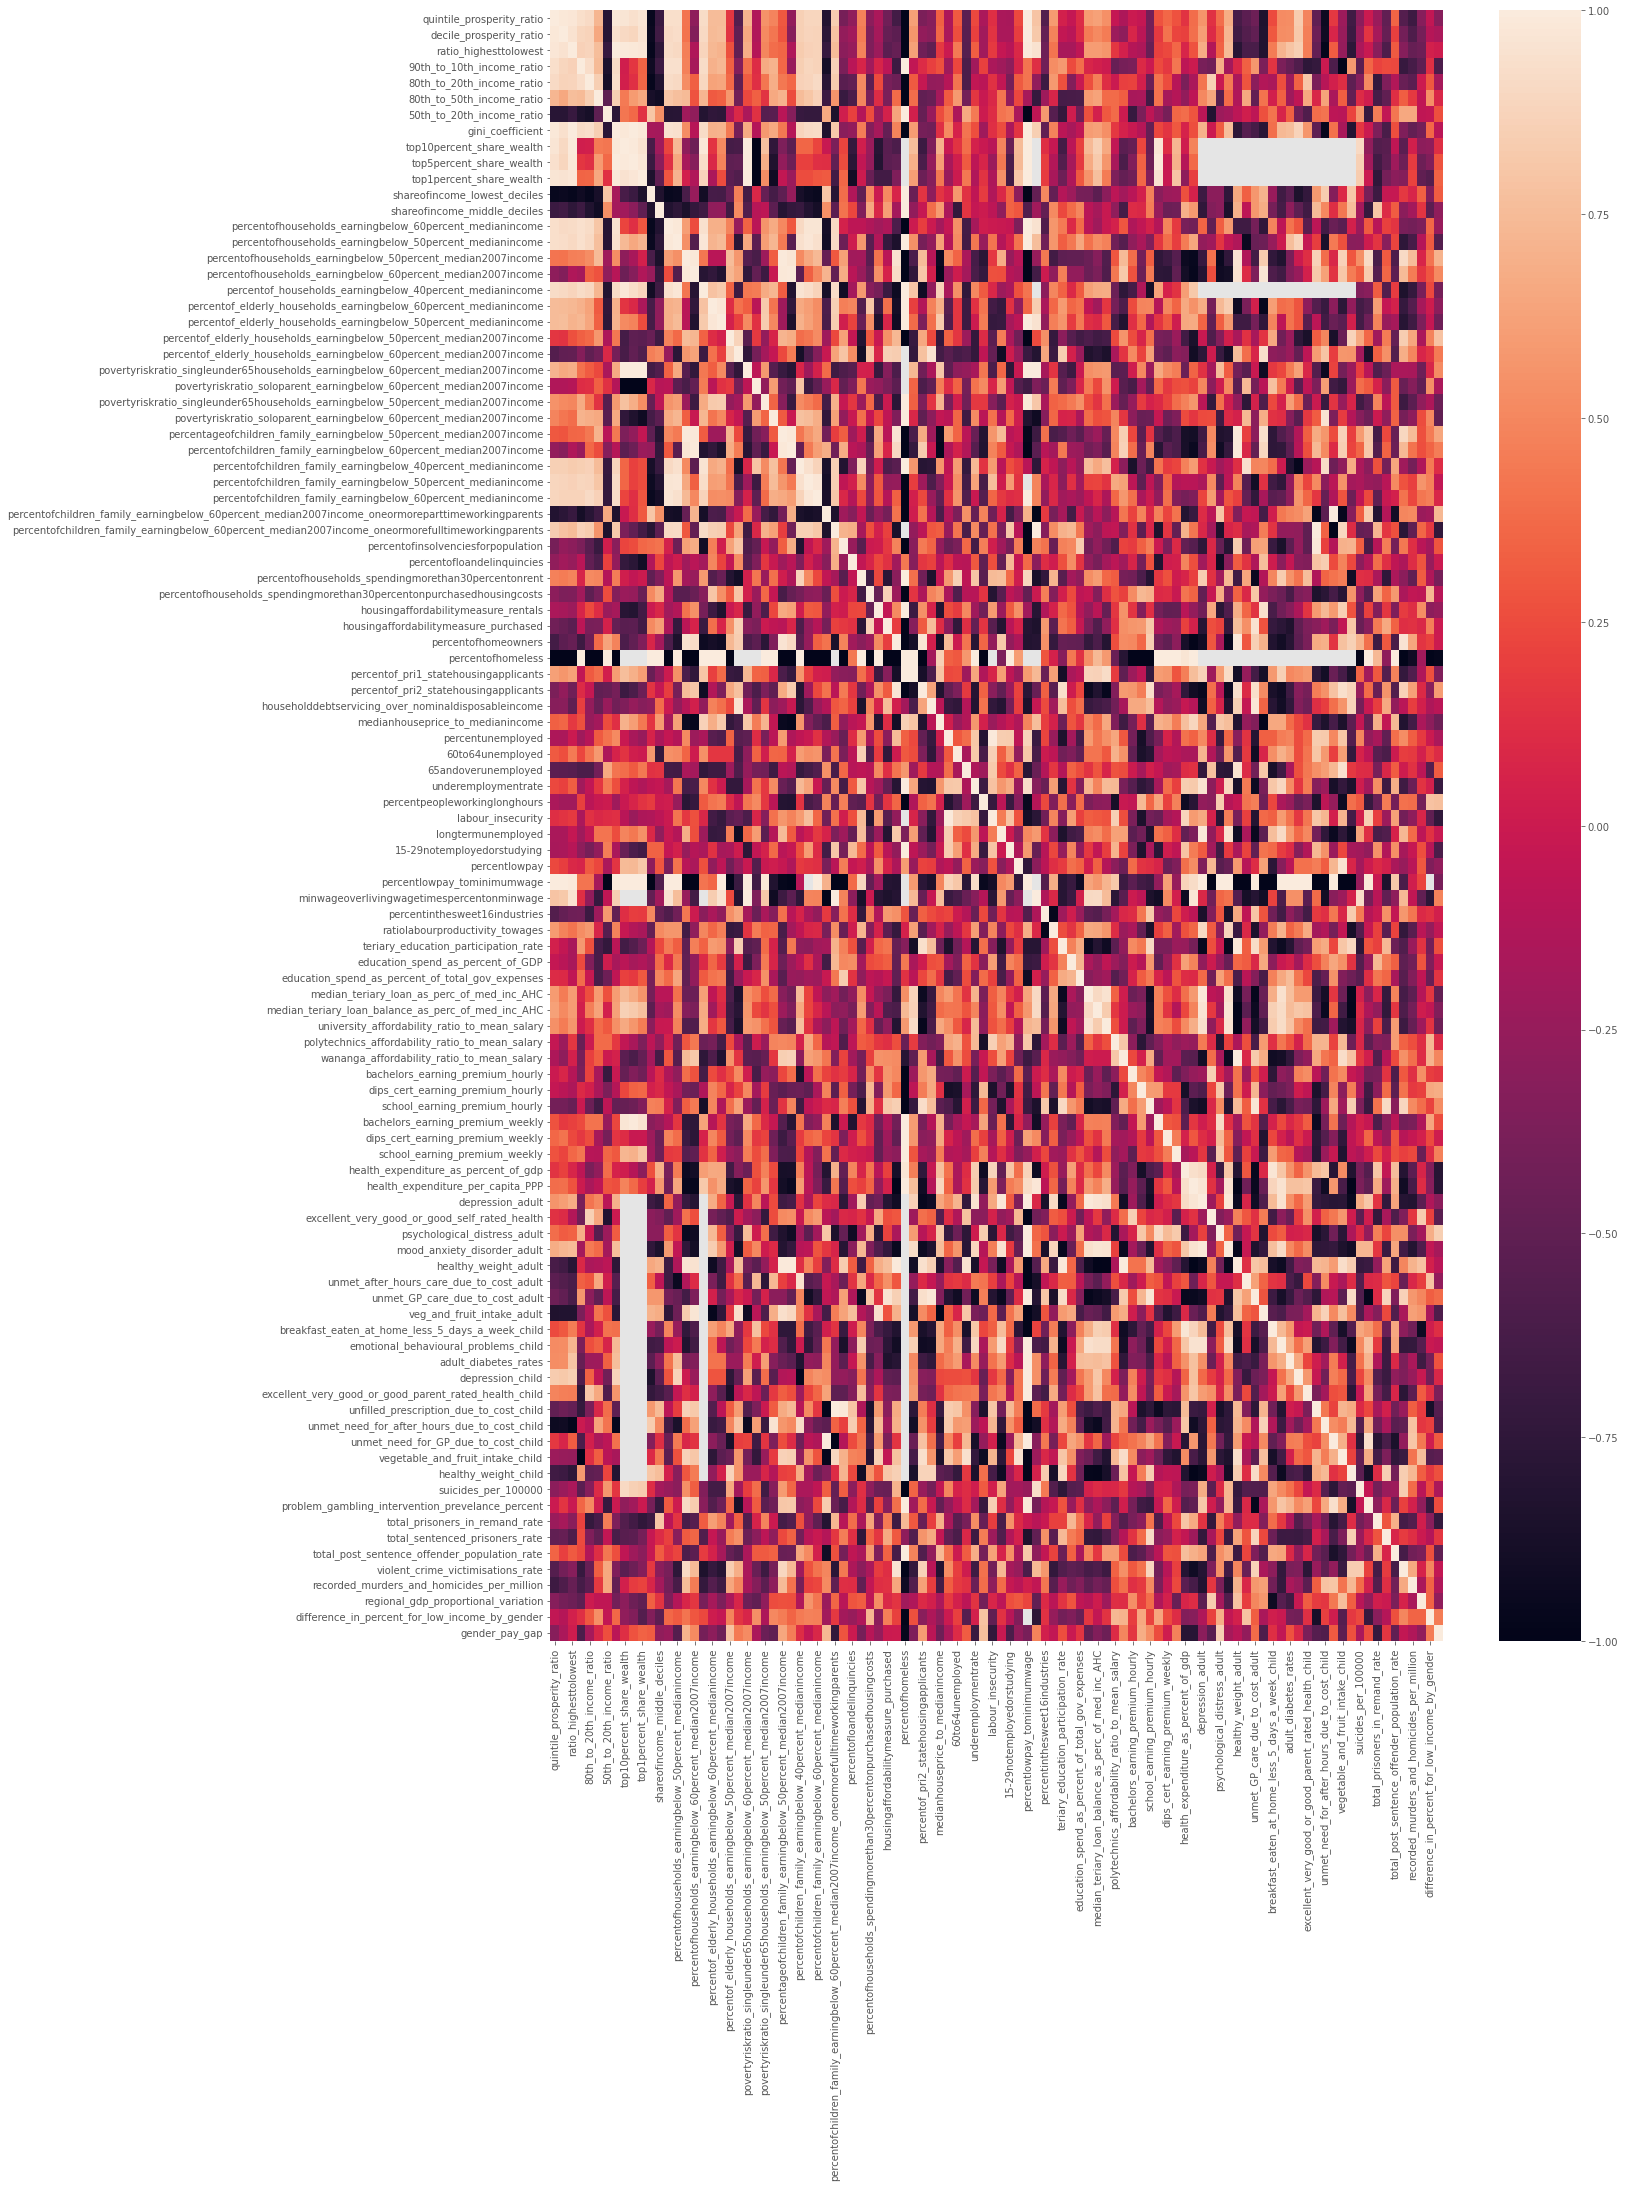

In [92]:
sns.heatmap(
    df.corr(),
    )

In [7]:
print(df.corr())

                                                    child_poverty_ahc_perc_HH_B50_CV  \
child_poverty_ahc_perc_HH_B50_CV                                            1.000000   
child_poverty_ahc_perc_HH_B60_CV                                            0.984314   
child_poverty_ahc_perc_HH_B40_contemp_median                                0.427620   
child_poverty_ahc_perc_HH_B50_contemp_median                                0.567222   
child_poverty_ahc_perc_HH_B60_contemp_median                                0.659782   
child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT...                         -0.412700   
child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT...                          0.195188   
rate_of_personal_insolvencies                                               0.322615   
loan_delinquency_percent                                                   -0.210258   
national_house_rental_A30%_income_spend                                     0.021989   
national_house_purchasing_A30%_i

Pairplots are also useful at seeing relationships between data. 

Below are some pairplots I used to have a  look at this. The pairplots are not able to show all the relationships in the datframe, as there are too many. By my count, there are around 26 relationships shown. 

In [93]:
sns.pairplot(df.iloc[:, 50: ])

In [ ]:
sns.pairplot(df.iloc[:, : 50])

#### The Graph Below
Below is a set of time series graphs with the raw data. These graphs shows that I need to go back to data wrangling and delete anything prior to 2008 for a lot of this data. For some of it, I will be able to interpolate between the missing data. 

#### Non-Sensicle Data
The graph with the title "percentofinsolvenciesforpopulation" shows that the percent of insolvencies went in a straight line downwards, and has been bouncing along the bottom for a while. This is highly likely to be incorrect. This entire column would be better off discarded. Same goes for "problem_gambling_prevalence_percent".

#### Interpolation
"percentofchildre_family_earningbelow_40percent_medianincome" is a prime candidate for an interpolation between the data that is there in the dataframe. This is because it is missing data in the middle of the graph. The data would have to be deleted for the years that are missing, as the equation would likely fill the rest of it with data that would likely see it below zero around the 1992 mark. 

#### Too good to be true?
Percent of home owners graph has an almost straight line down over time. There is a slight bend in the middle, however this is a fairly unusual visualisation. I would have expected there to be some bouncing up and down over time. There is not, and it looks suspect. Here I would recheck the data, and reload it. In this case, I am going to trust that it is correct as I don't have access to the source. 



In [84]:
df_first10 = df.iloc[:,:10]
df_second10 = df.iloc[:,11:20]
df_third10 = df.iloc[:,21:30]
df_fourth10 = df.iloc[:,31:40]
df_fifth10 = df.iloc[:,41:50]
df_sixth10 = df.iloc[:,51:60]
df_seventh10 = df.iloc[:,61:70]
df_eighth10 = df.iloc[:,71:80]
df_ninth10 = df.iloc[:,81:]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

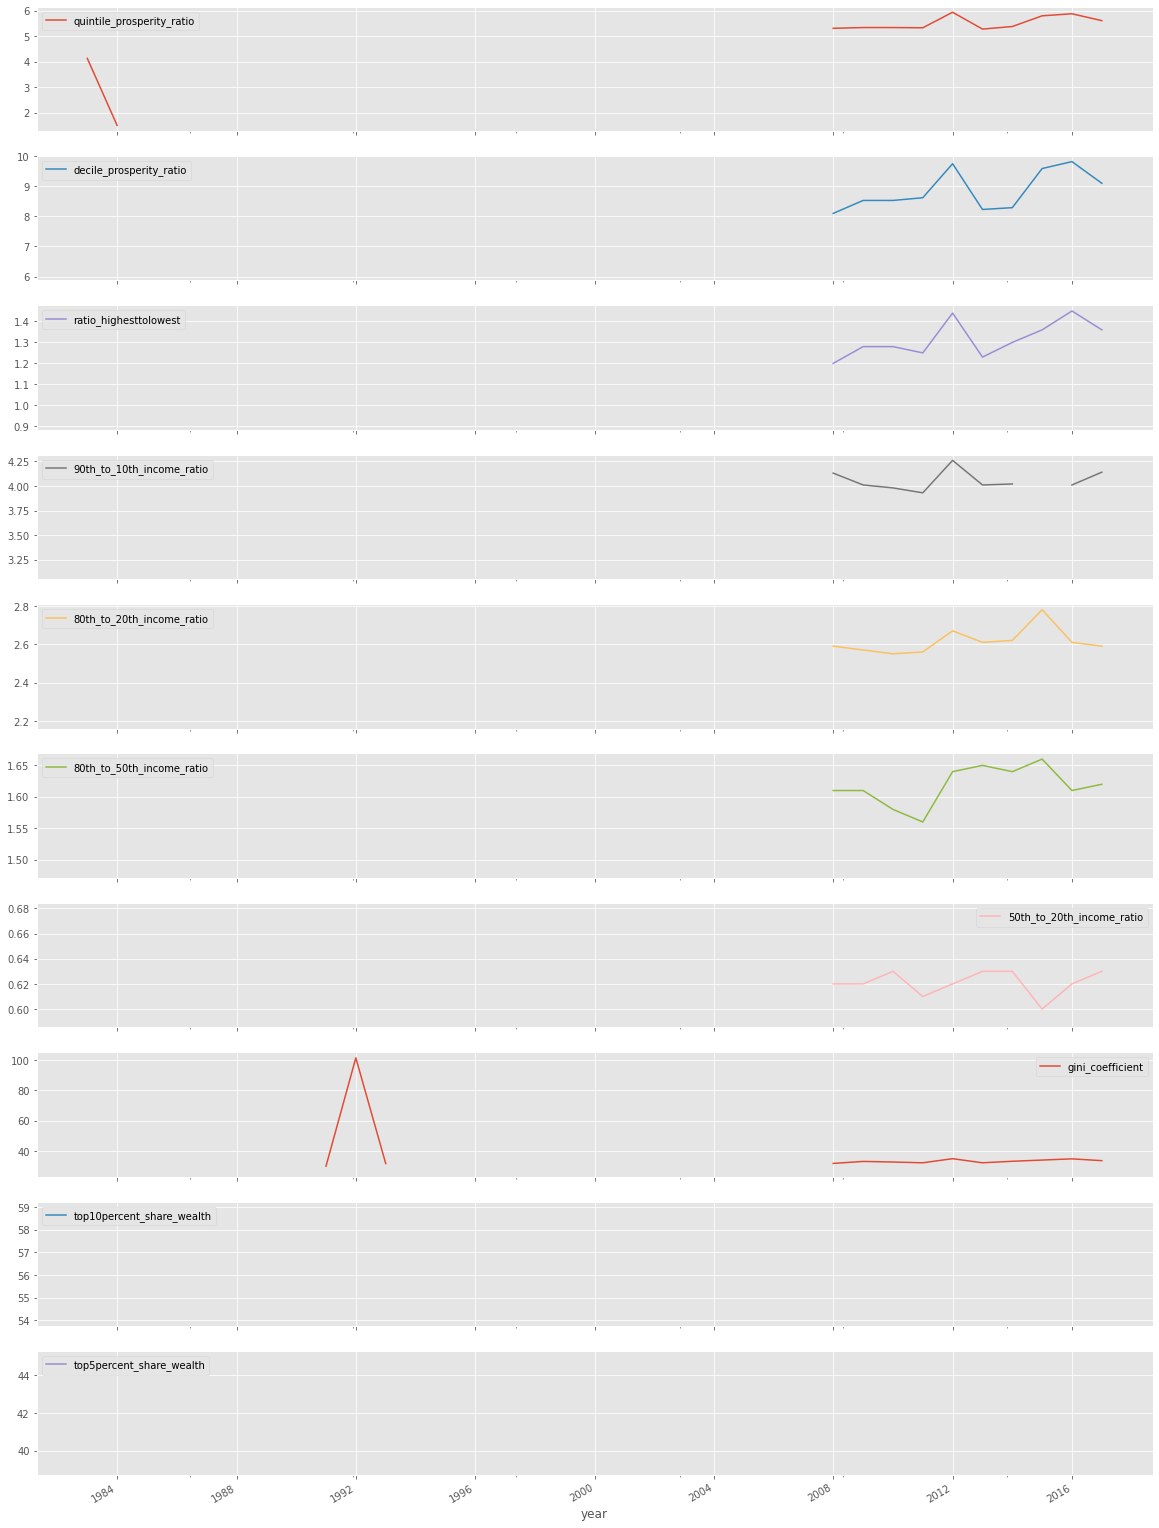

In [74]:
rcParams['figure.figsize'] = 20, 30
df_first10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

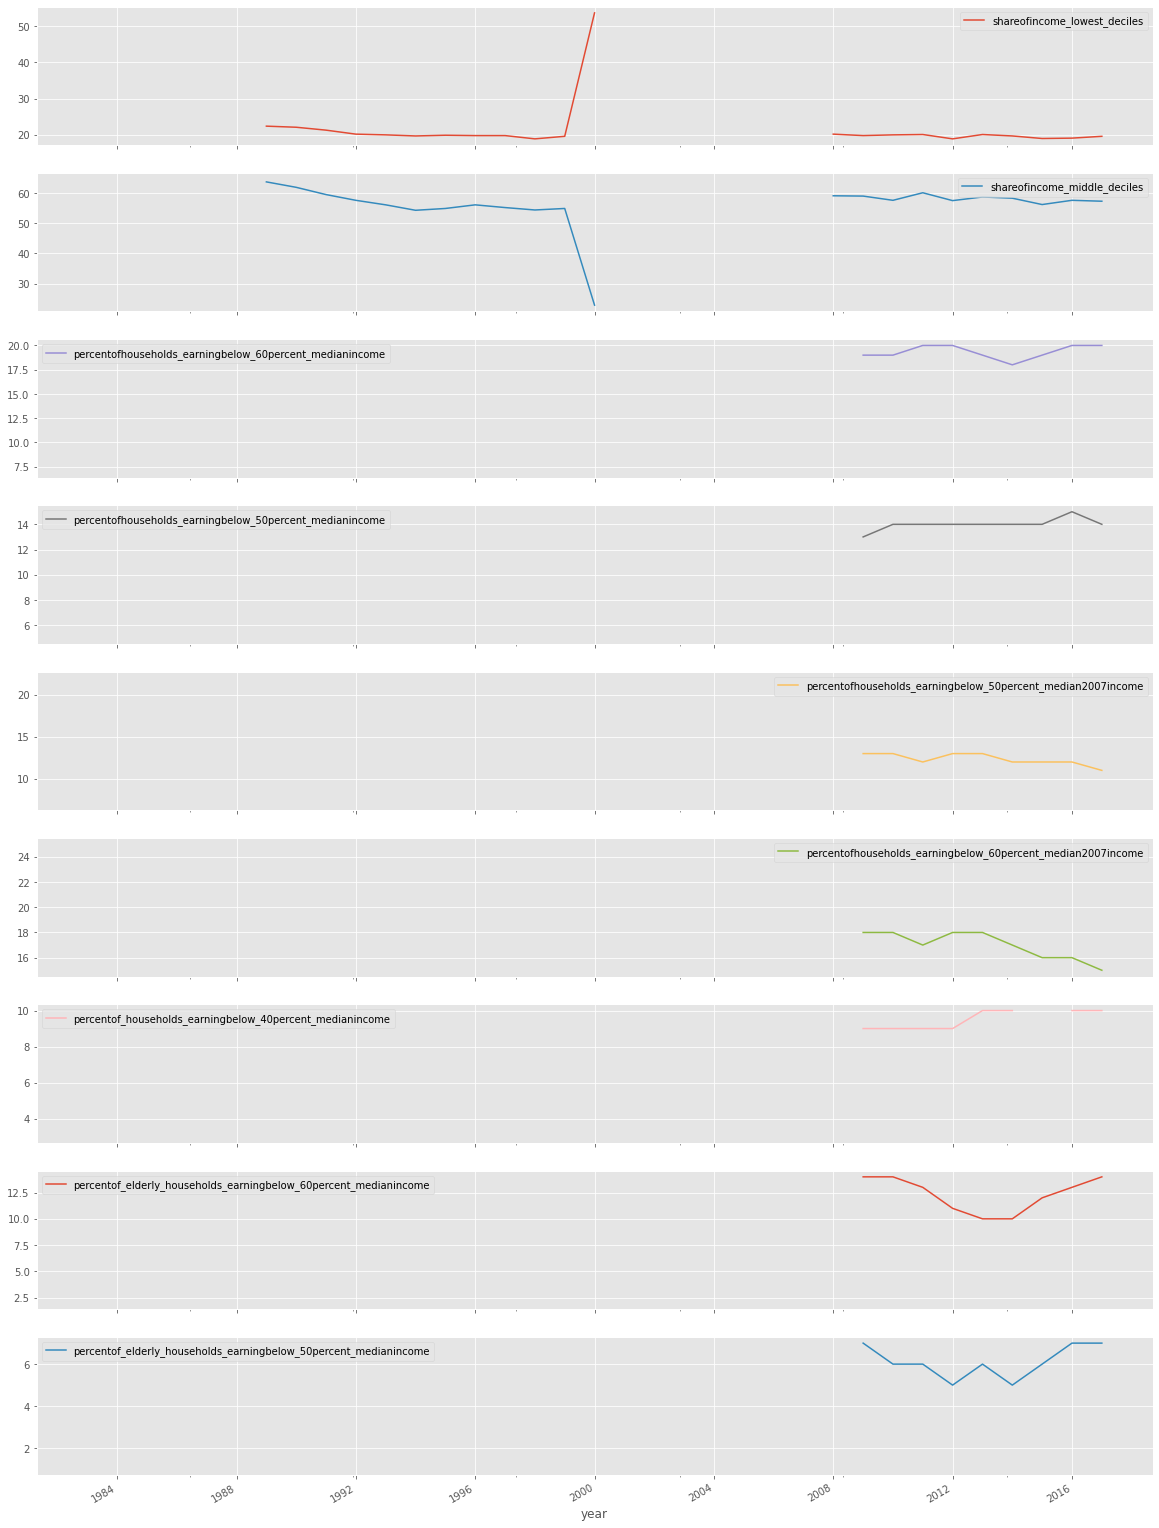

In [76]:
rcParams['figure.figsize'] = 20, 30
df_second10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

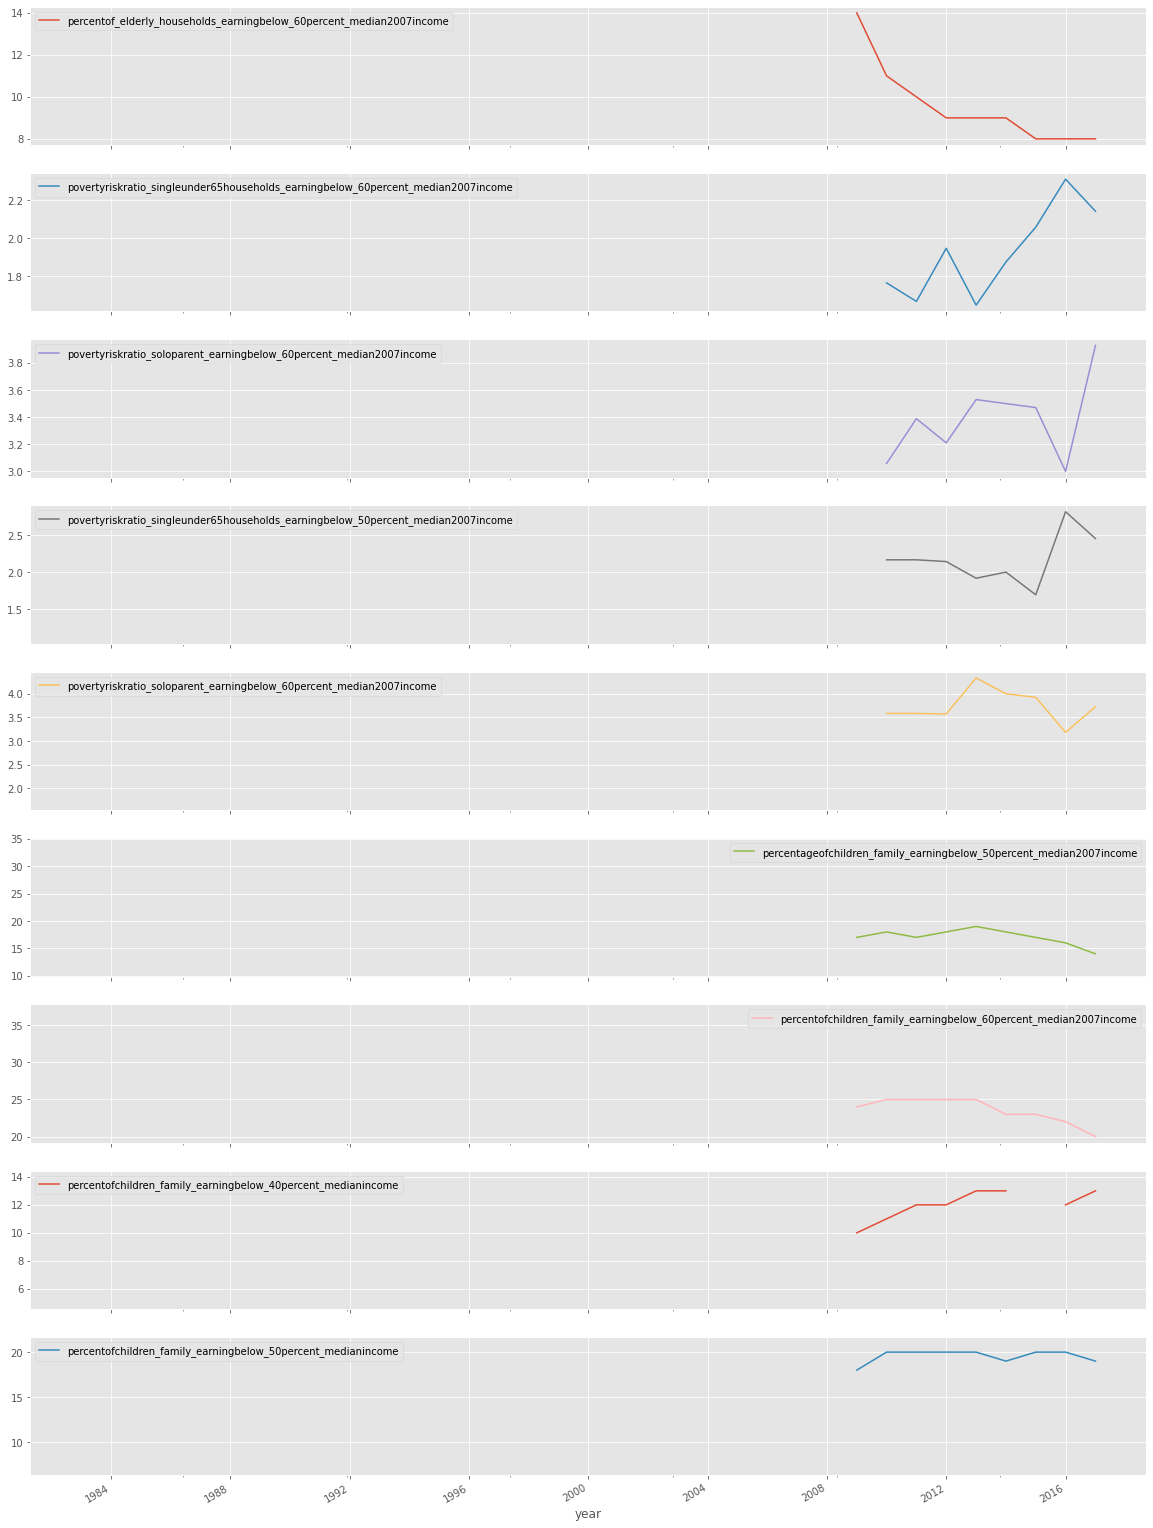

In [77]:
rcParams['figure.figsize'] = 20, 30
df_third10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

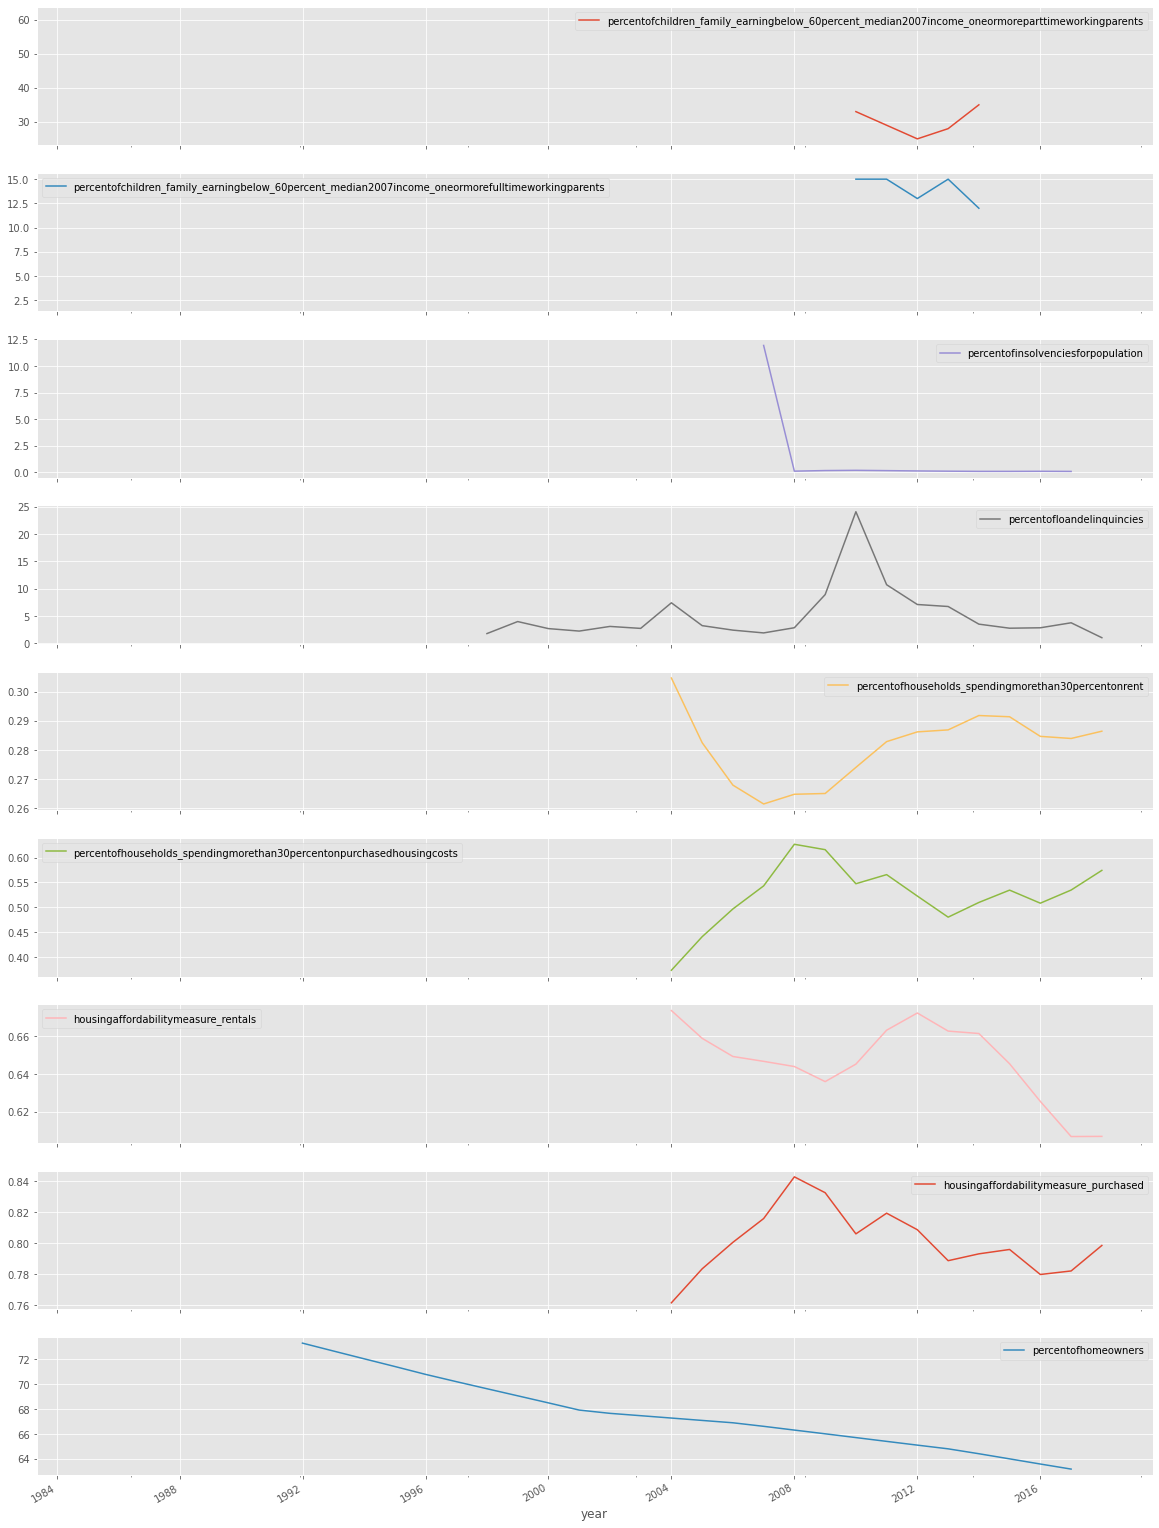

In [83]:
rcParams['figure.figsize'] = 20, 30
df_fourth10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

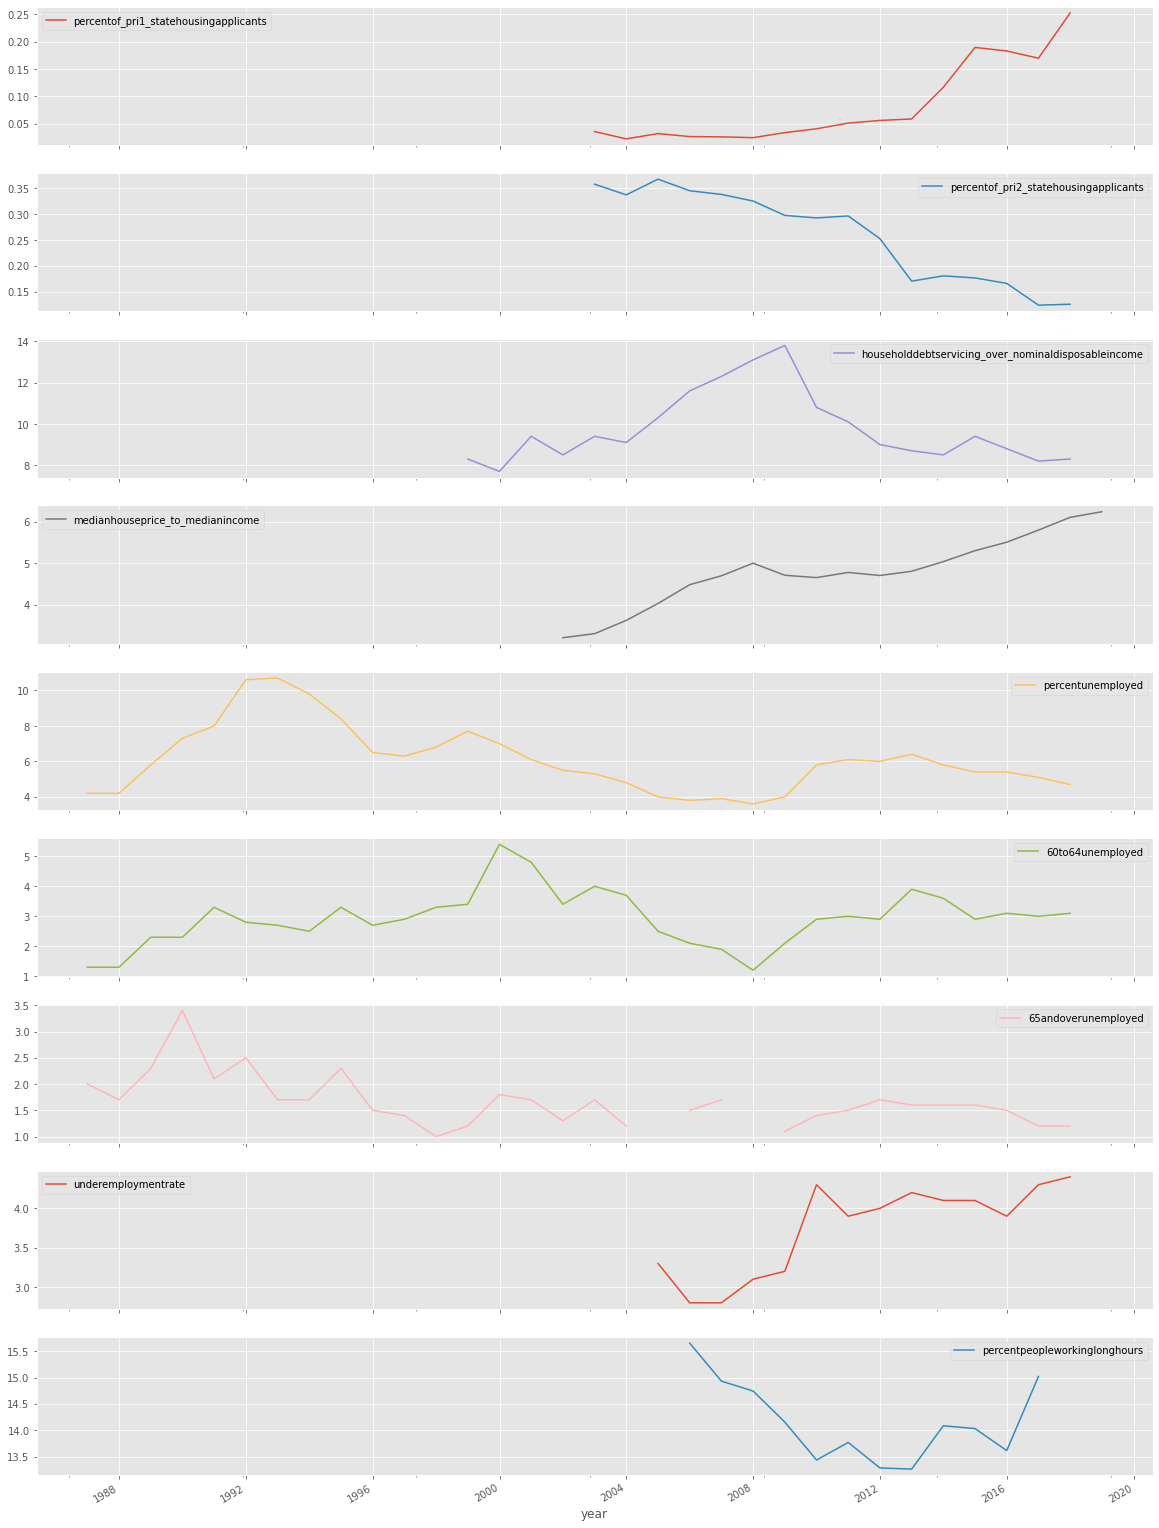

In [80]:
rcParams['figure.figsize'] = 20, 30
df_fifth10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

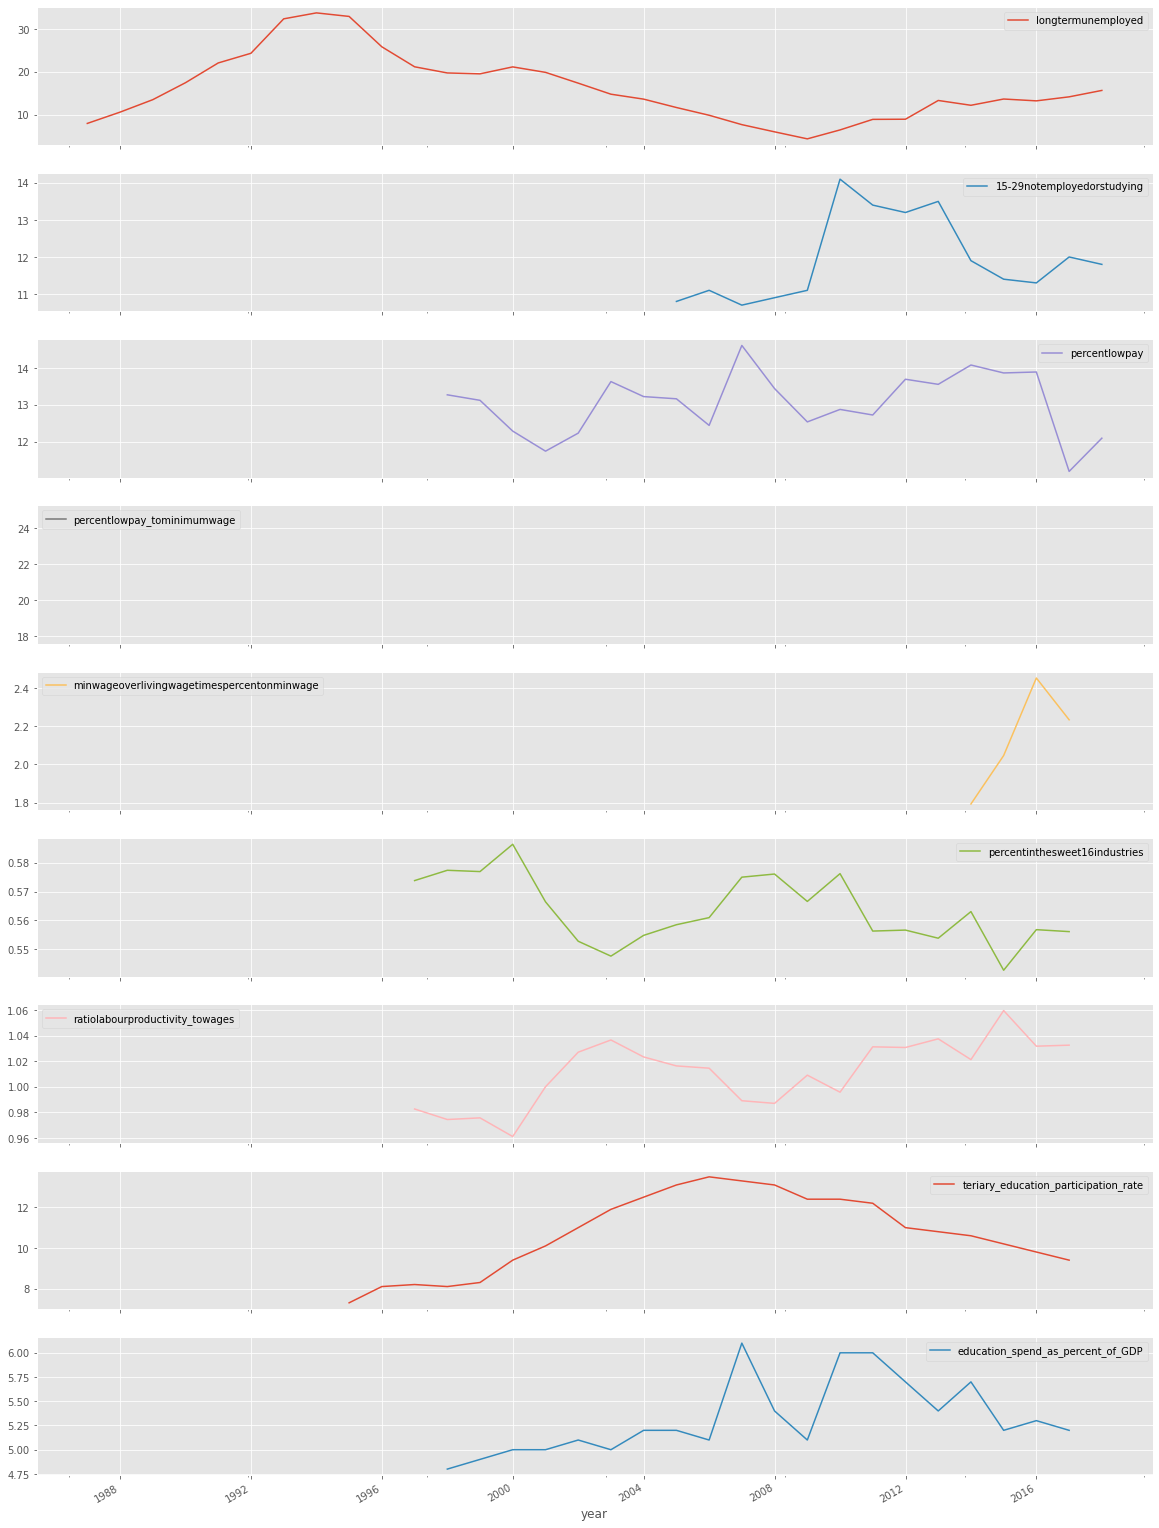

In [81]:
rcParams['figure.figsize'] = 20, 30
df_sixth10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

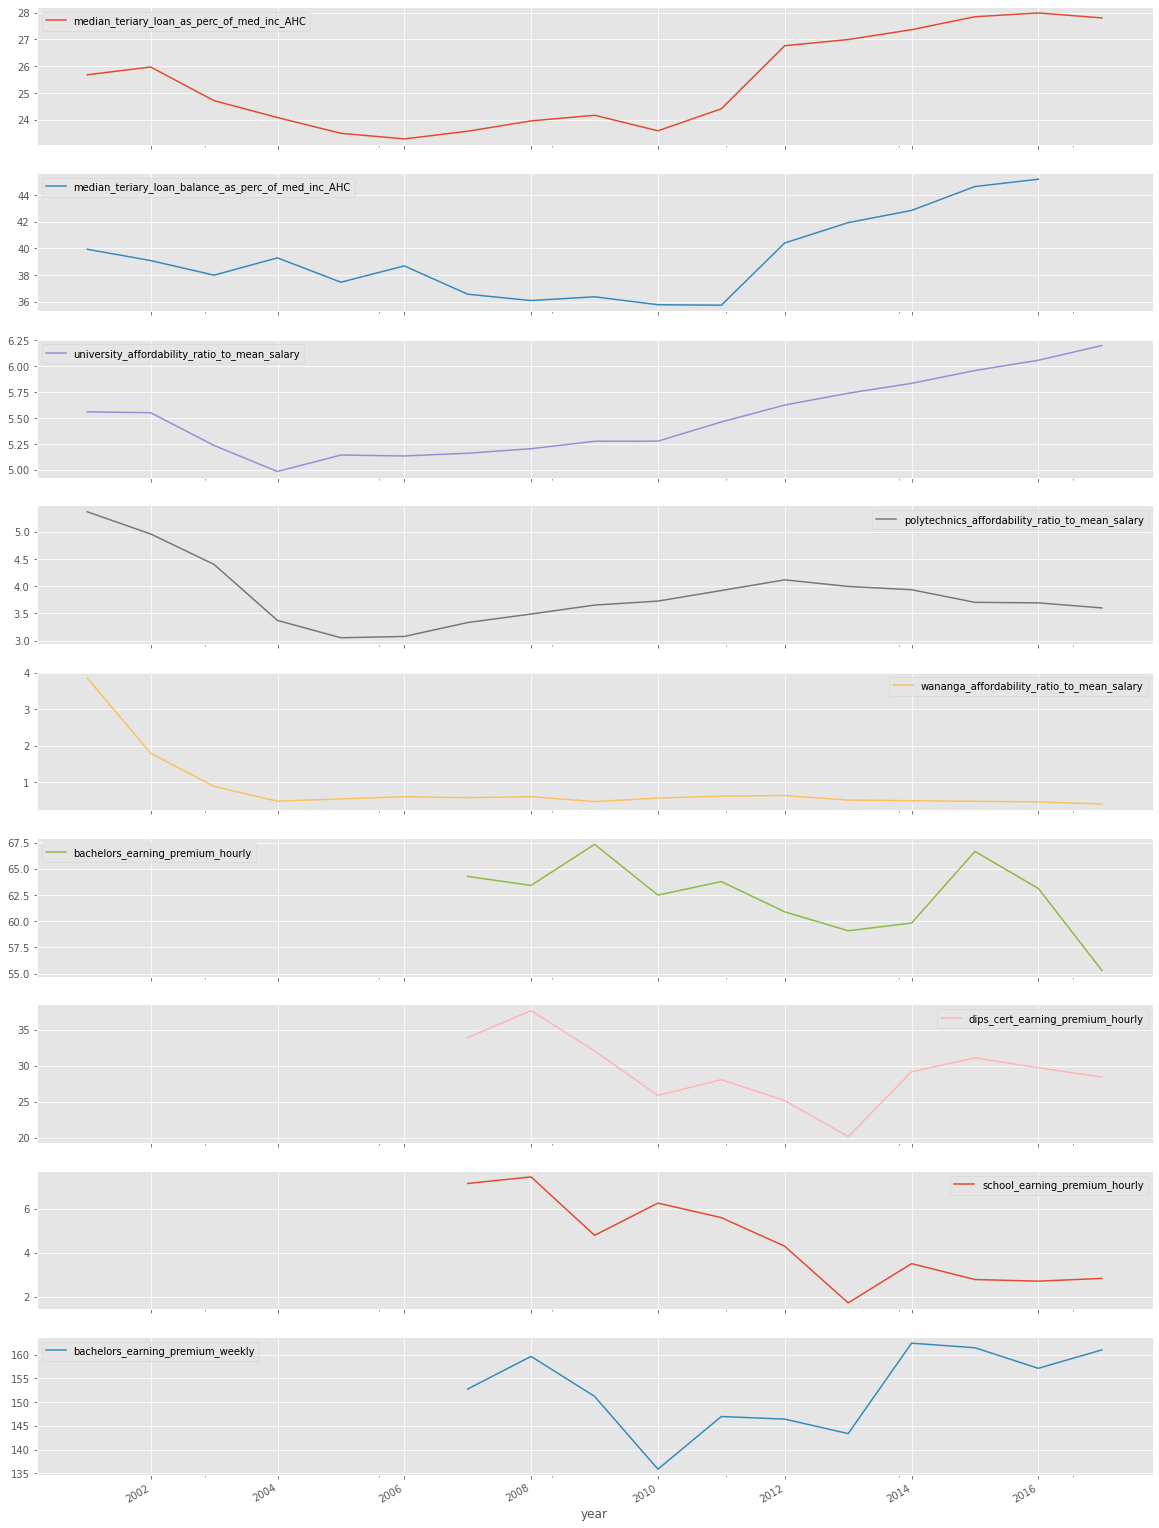

In [85]:
rcParams['figure.figsize'] = 20, 30
df_seventh10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

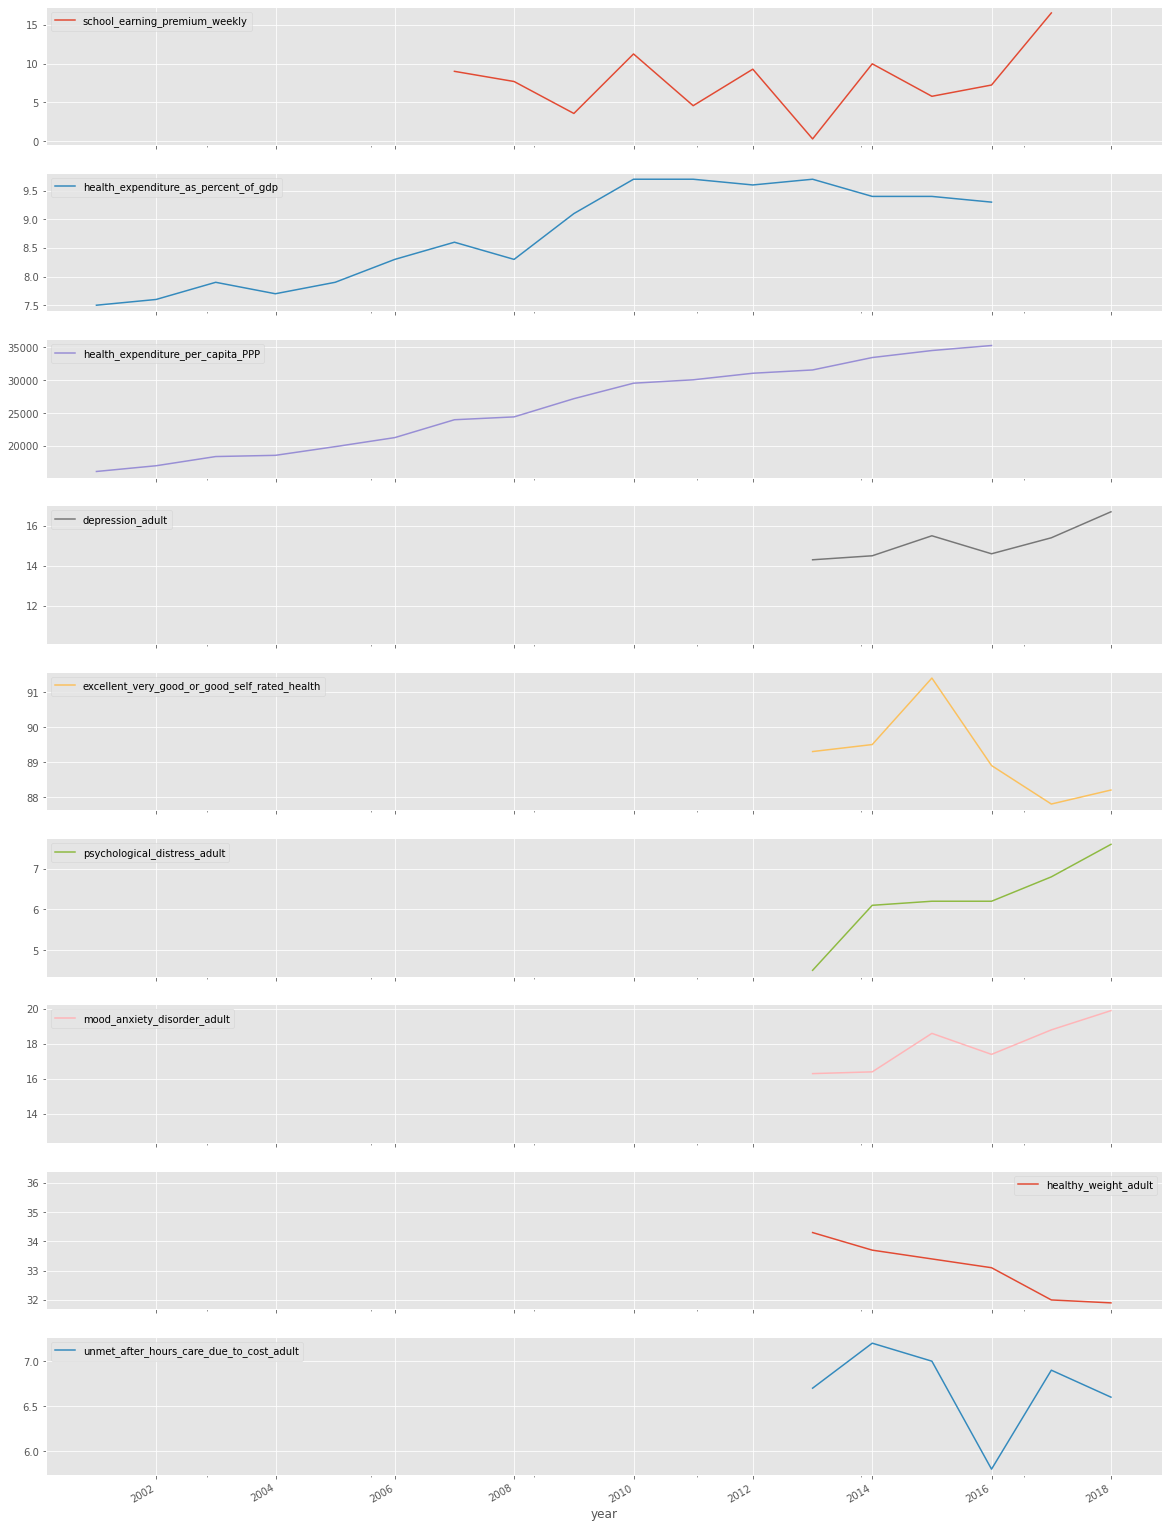

In [87]:
rcParams['figure.figsize'] = 20, 30
df_eighth10.plot(subplots=True)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

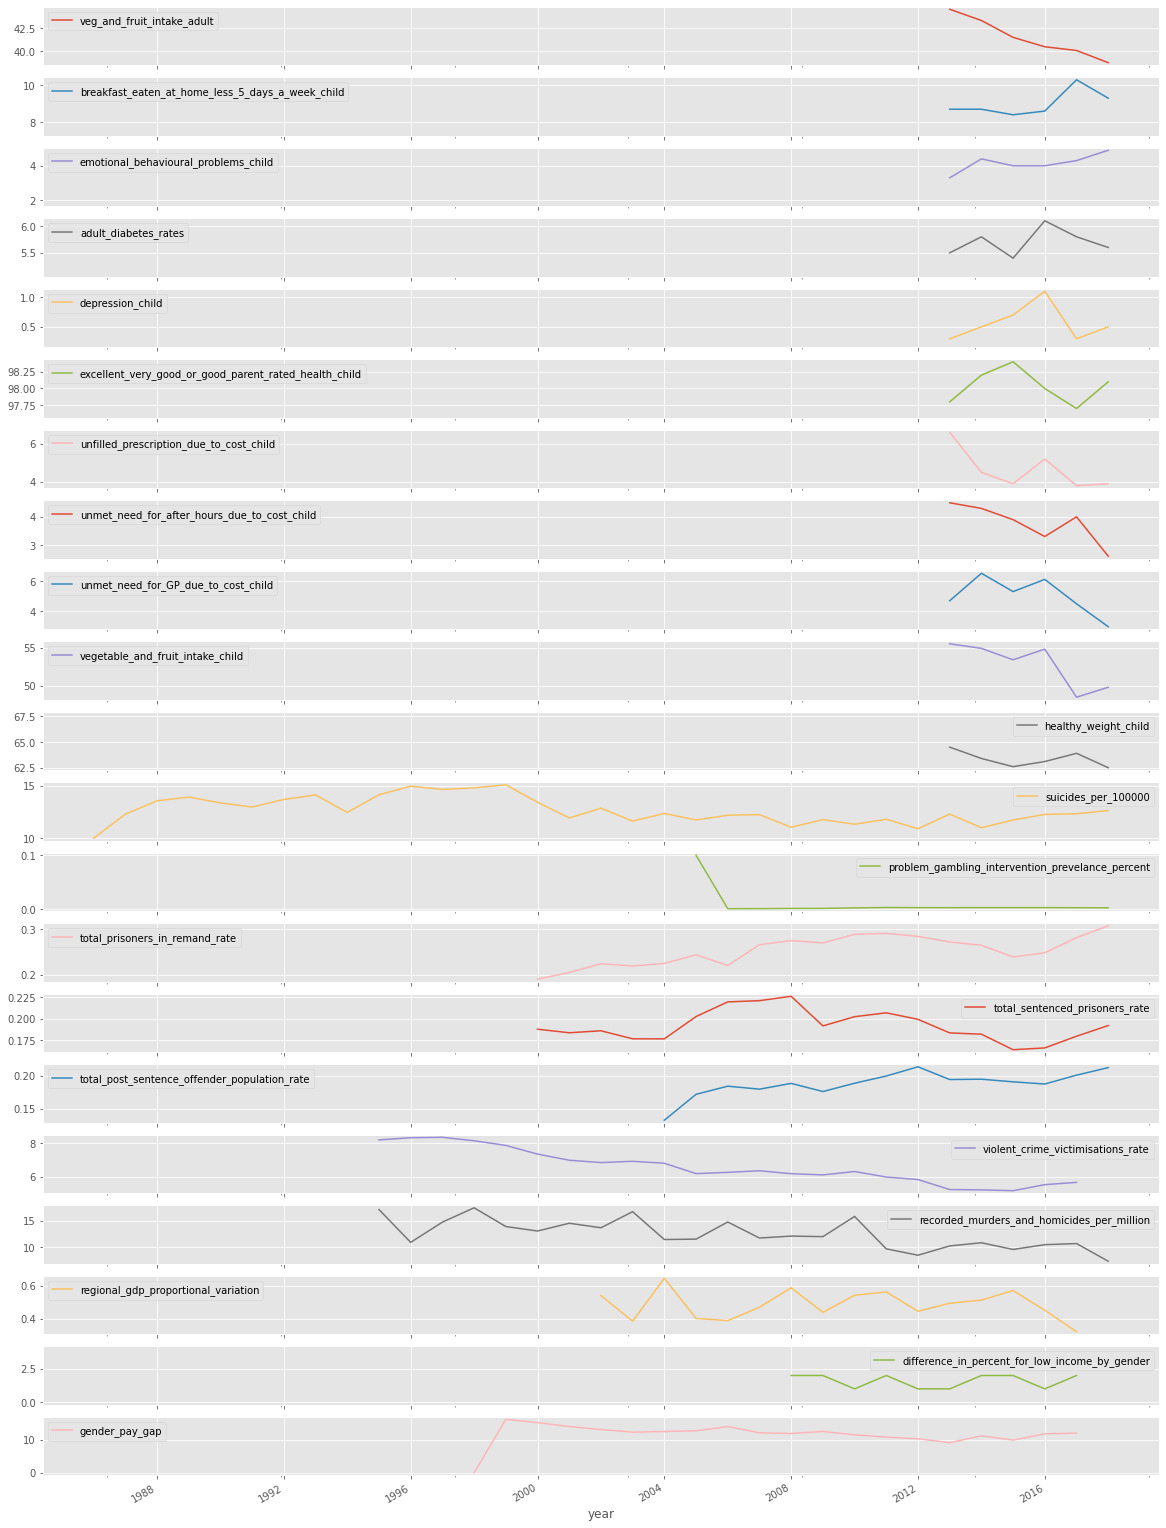

In [86]:
rcParams['figure.figsize'] = 20, 30
df_ninth10.plot(subplots=True)

#### Back to Go, Don't Pick up $200
Here I discover something curious. The data is laden with letters where there should really be just numbers. This means I have to go back to data wrangling and clean them out. The NaNs don't really affect the graphs, but I would imagine they will affect the code to clean the data up. 

I went back here to the start and cleaned the data of the letters and converted them to floats. 


In [19]:
df.breakfast_eaten_at_home_less_5_days_a_week_child

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6      G9.3
7      N8.7
8      I8.7
9       NaN
10      NaN
11      NaN
12      NaN
13     8.6P
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23     T7.4
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29     M8.4
30      NaN
31      NaN
32    J10.3
33      NaN
34      NaN
35      NaN
36      NaN
Name: breakfast_eaten_at_home_less_5_days_a_week_child, dtype: object

#### Interactive Graphs
This graph below is an interacitive graph where the user can hover over the graph and see the raw data. 

Ultimately I would like to have a drop down box to change the data that I am comparing to make it easier for the user to play around with the data and get insights that they would like to see. 


#### Analysis
In terms of gaining insights from the data, the below graph shows that as more children didn't eat breakfast at home five days a week, a higher proportion of children also experienced emotional problems. This seems about right. In the past when I have been starved as part of my job in the Army I experienced an emotional pull-back/withdrawal and a very strong drive for food for around 5-6 days.  

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import re



fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["breakfast_eaten_at_home_less_5_days_a_week_child"],
        mode="lines",
        name="Brekkie at Home"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["emotional_behavioural_problems_child"],
        mode="lines",
        name="Emotional Problems"
    ),
    row=2, col=1
)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Breakfast vs Emotions",
)

fig.show()

#### Bank Plotting

Looking at this data bank interest rates have not changed a huge amount over time. What has is the equity and liabilities that banks in New Zealand have. This is largely expected as banks should increase their liabilities and assets over time as they make profits and re-invest in the New Zealand economy. 

<AxesSubplot:title={'center':'Bank Income, Equity and Interest Over Time'}, xlabel='quarter'>

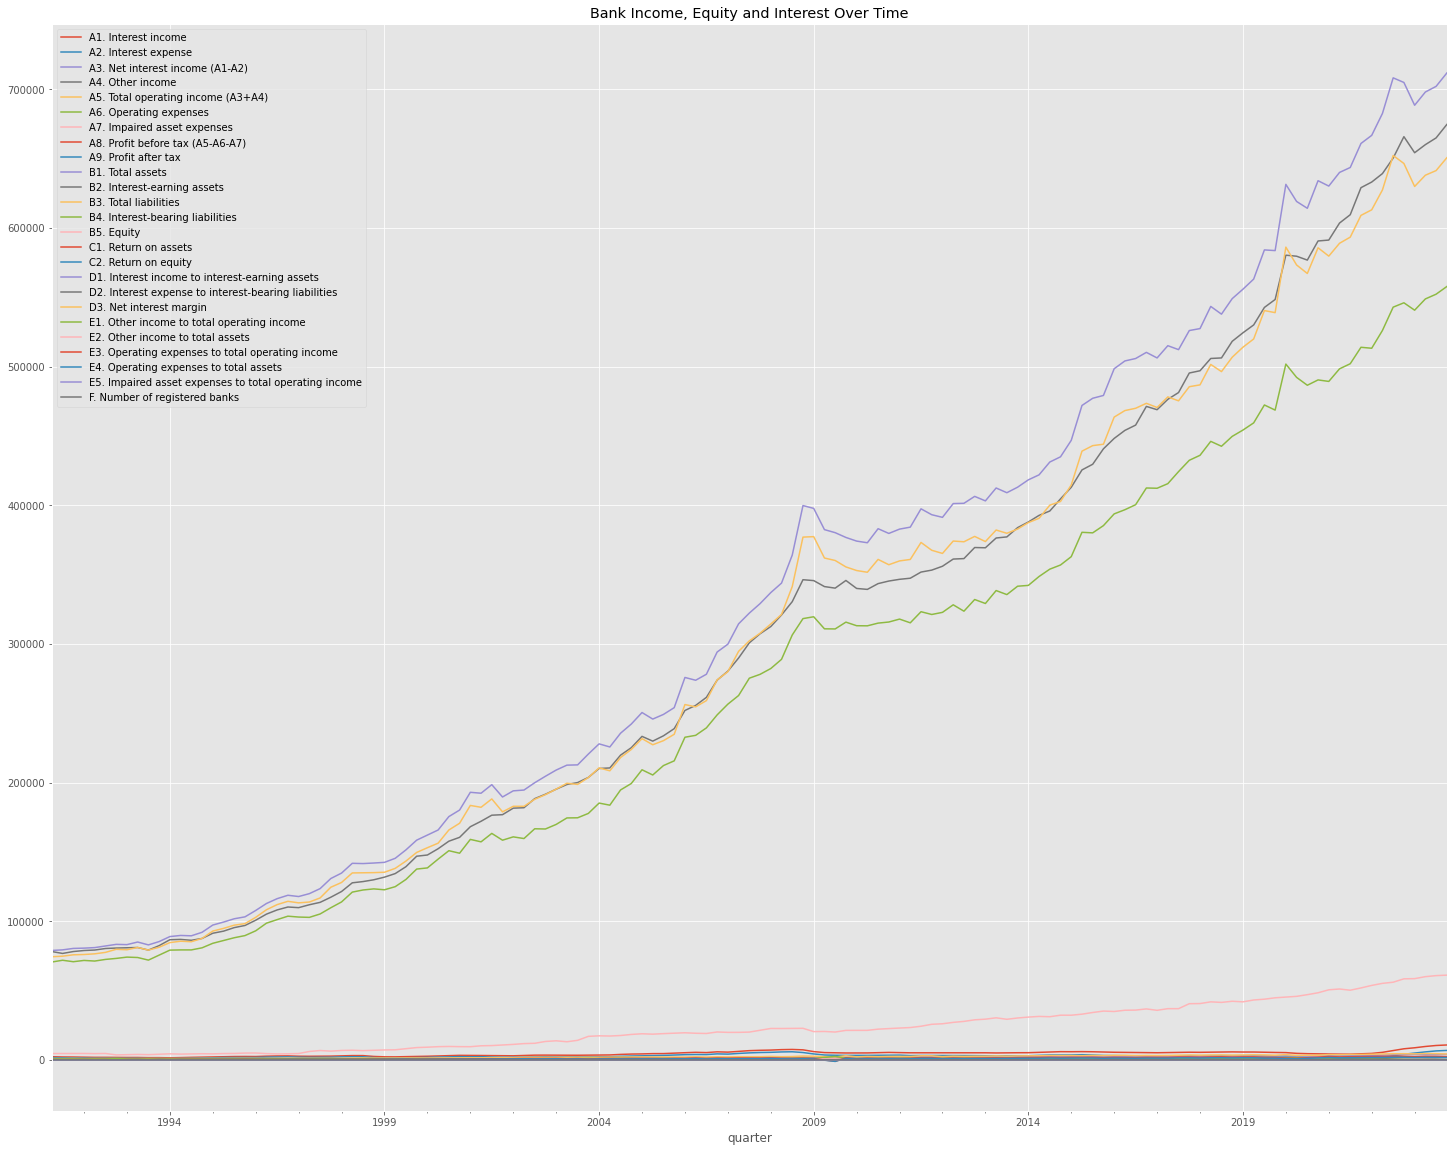

In [65]:
df_bankinterest.plot(x='quarter', title="Bank Income, Equity and Interest Over Time")

# Analysis 

In [32]:
df_mean.head()

quintile_prosperity_ratio  decile_prosperity_ratio  \
year                                                             
1994-12-31                   5.090000                 8.030000   
1990-12-31                   4.460000                 6.350000   
2011-12-31                   5.940000                 9.750000   
2004-12-31                   5.510000                 9.150000   
1987-12-31                   5.034444                 8.310588   

            ratio_highesttolowest  90th_to_10th_income_ratio  \
year                                                           
1994-12-31               1.210000                     3.8700   
1990-12-31               1.100000                     3.4300   
2011-12-31               1.440000                     4.2600   
2004-12-31               1.310000                     4.1700   
1987-12-31               1.249412                     3.8005   

            80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
year                                                               
1994-12-31                   2.520000                    1.66000   
1990-12-31                   2.420000                    1.60000   
2011-12-31                   2.670000                    1.64000   
2004-12-31                   2.740000                    1.62000   
1987-12-31                   2.534286                    1.60381   

            50th_to_20th_income_ratio  gini_coefficient  \
year                                                      
1994-12-31                   0.660000         32.200000   
1990-12-31                   0.660000         30.200000   
2011-12-31                   0.620000         35.100000   
2004-12-31                   0.590000         33.400000   
1987-12-31                   0.635714         35.109091   

            top10percent_share_wealth  top5percent_share_wealth  \
year                                                              
1994-12-31                       56.0                      41.8   
1990-12-31                       56.0                      41.8   
2011-12-31                       56.0                      41.8   
2004-12-31                       55.0                      41.0   
1987-12-31                       56.0                      41.8   

            top1percent_share_wealth  shareofincome_lowest_deciles  \
year                                                                 
1994-12-31                      20.0                     19.900000   
1990-12-31                      20.0                     21.300000   
2011-12-31                      20.0                     18.900000   
2004-12-31                      20.0                     19.000000   
1987-12-31                      20.0                     21.455556   

            shareofincome_middle_deciles  \
year                                       
1994-12-31                     54.900000   
1990-12-31                     59.500000   
2011-12-31                     57.500000   
2004-12-31                     54.600000   
1987-12-31                     56.707407   

            percentofhouseholds_earningbelow_60percent_medianincome  \
year                                                                  
1994-12-31                                               19.0         
1990-12-31                                               11.0         
2011-12-31                                               20.0         
2004-12-31                                               20.0         
1987-12-31                                               16.6         

            percentofhouseholds_earningbelow_50percent_medianincome  \
year                                                                  
1994-12-31                                               13.0         
1990-12-31                                                6.0         
2011-12-31                                               14.0         
2004-12-31                                               14.0         
1987-12-31     

#### What Happened in 1992...

Wow. I was not expecting to see that. A huge increase in the gini coefficient in 1992 relative to the rest of the data. It begs the question, what happened in 1992? 

1992 was one year after The Employment Contracts Act (ECA) 1991 was introduced. This created a free market for employment in New Zealand. Before this leabour in New Zealand was heavily regulated, with unions negotiating wages and benefits for all employees for entire industries. When workers changed jobs in different companies, they knew what wages and benefits they would receive before they moved. After the ECA, workers had to negotiate their own wages with their employers. 

Text(0.5, 1.0, 'Gini Coefficient')

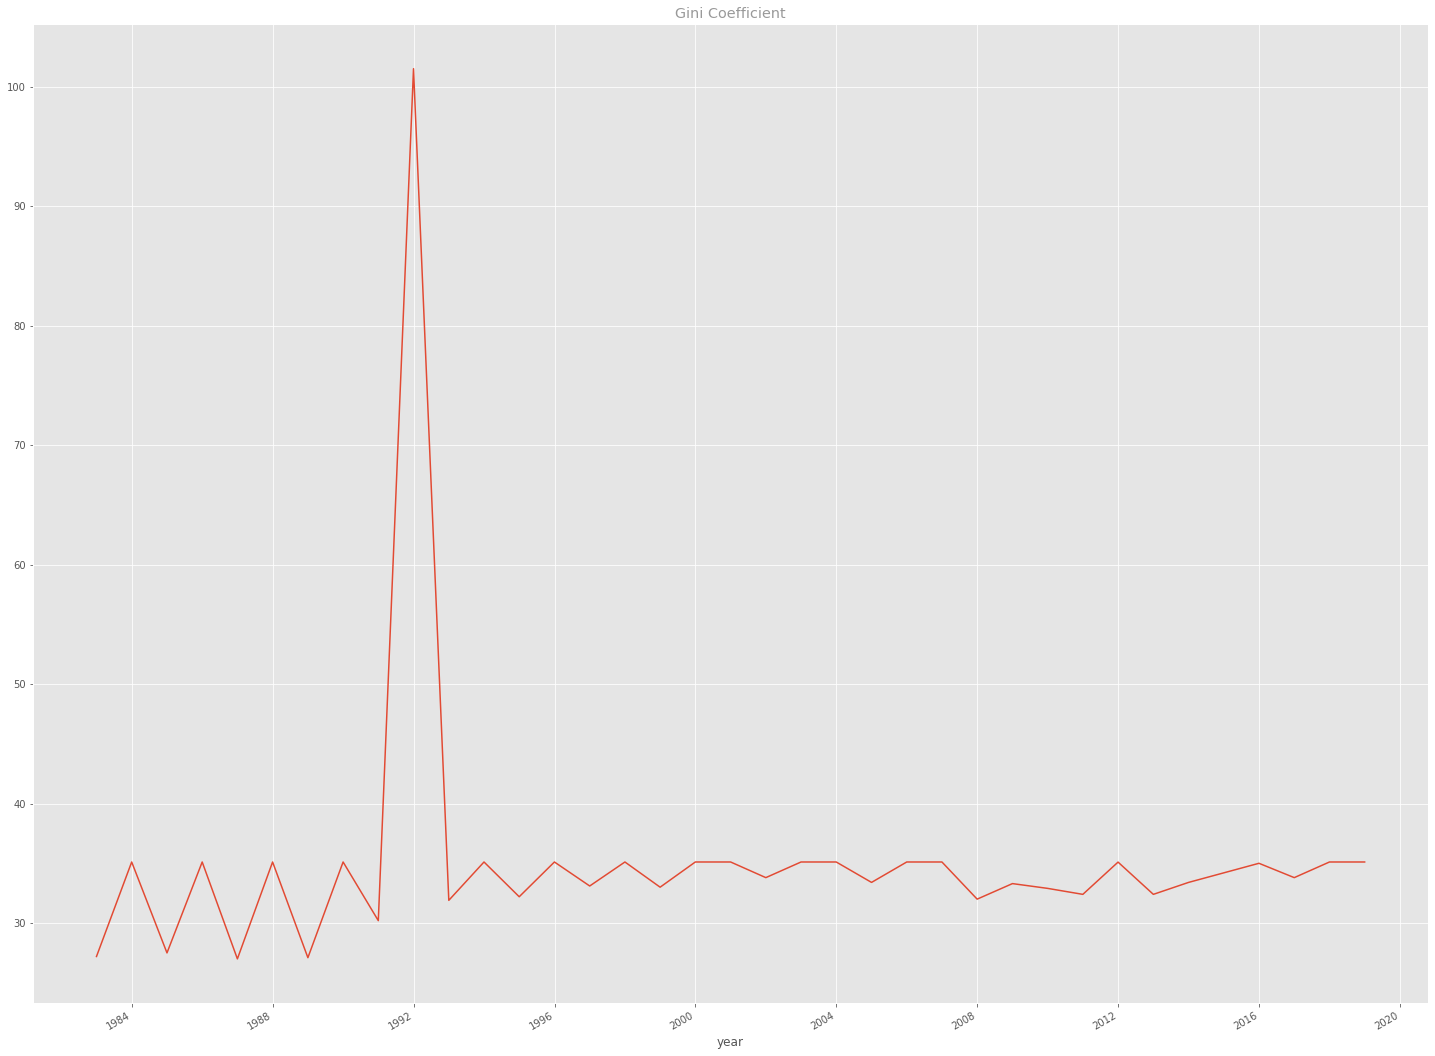

In [45]:
df_mean['gini_coefficient'].plot()
plot.title("Gini Coefficient", alpha=0.4)

#### Lets Compare

Here I'm going to compare the gini coeffient with some more variables. As we can see in the graphs below, there is a small increase in the measures of inequality over time. This is not massive surprise as the gini coeffient has largely increased over time. 

Text(0.5, 1.0, 'Gini Coefficient')

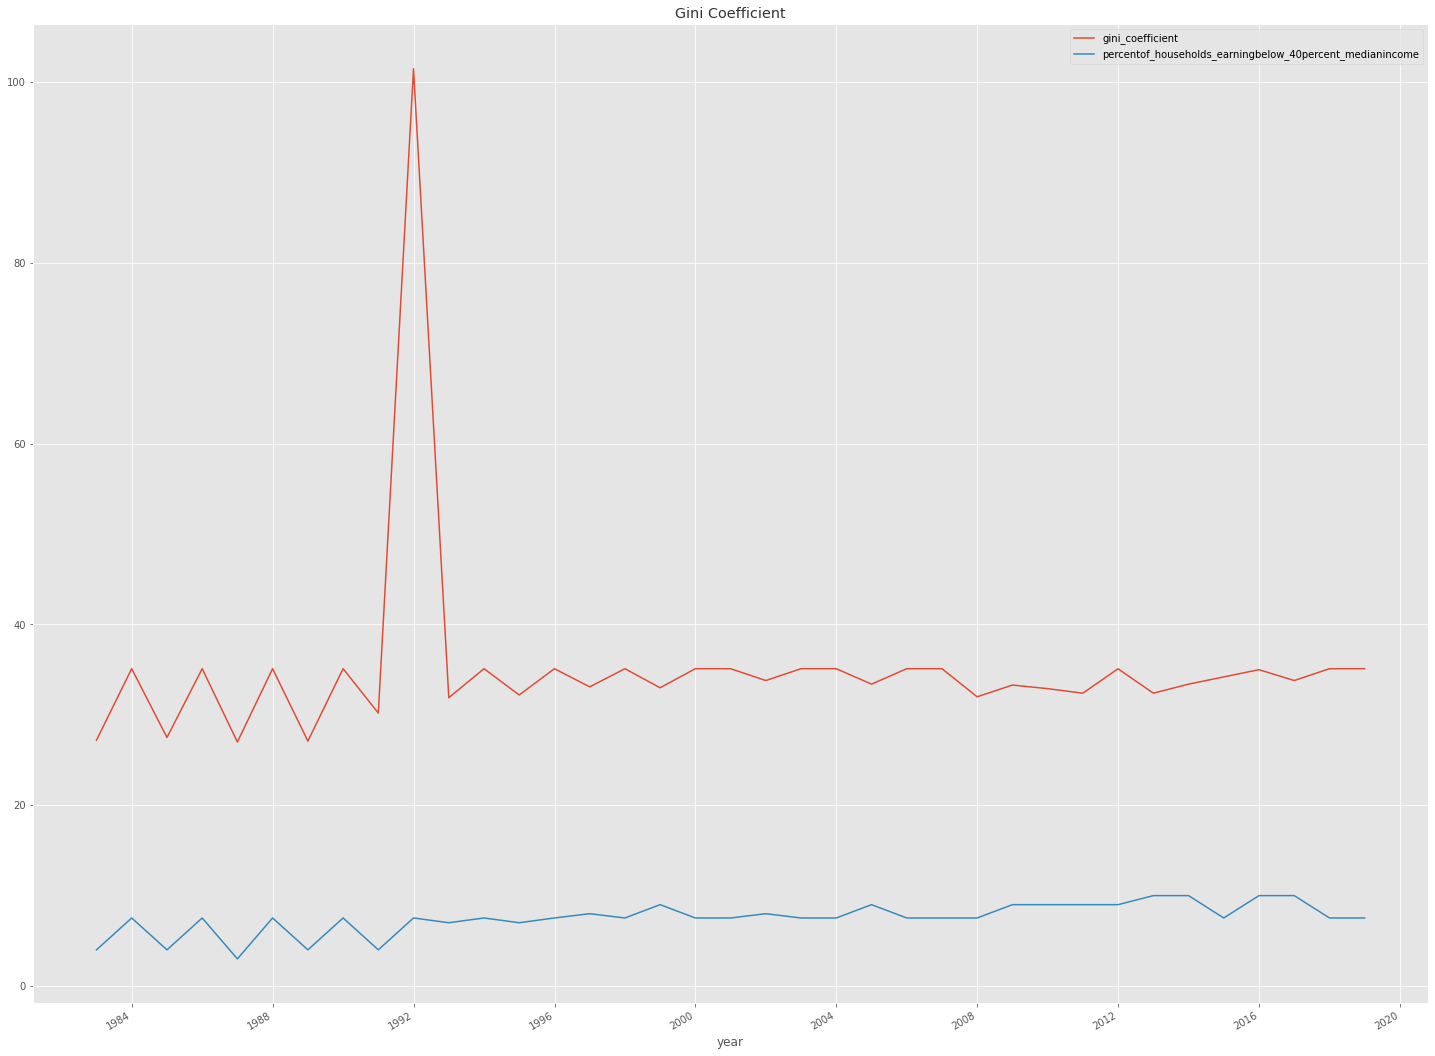

In [54]:
df_gini_percenthousebelow40 = df_mean[['gini_coefficient','percentof_households_earningbelow_40percent_medianincome']]
df_gini_percenthousebelow40.plot()
plot.title("Gini Coefficient", alpha=0.8)

#### Getting Grisly

Here I take a smattering of grisly variables, and compare them with the gini coefficient over time. 

Text(0.5, 1.0, 'Gini Coefficient Compared with Other Grisly Variables')

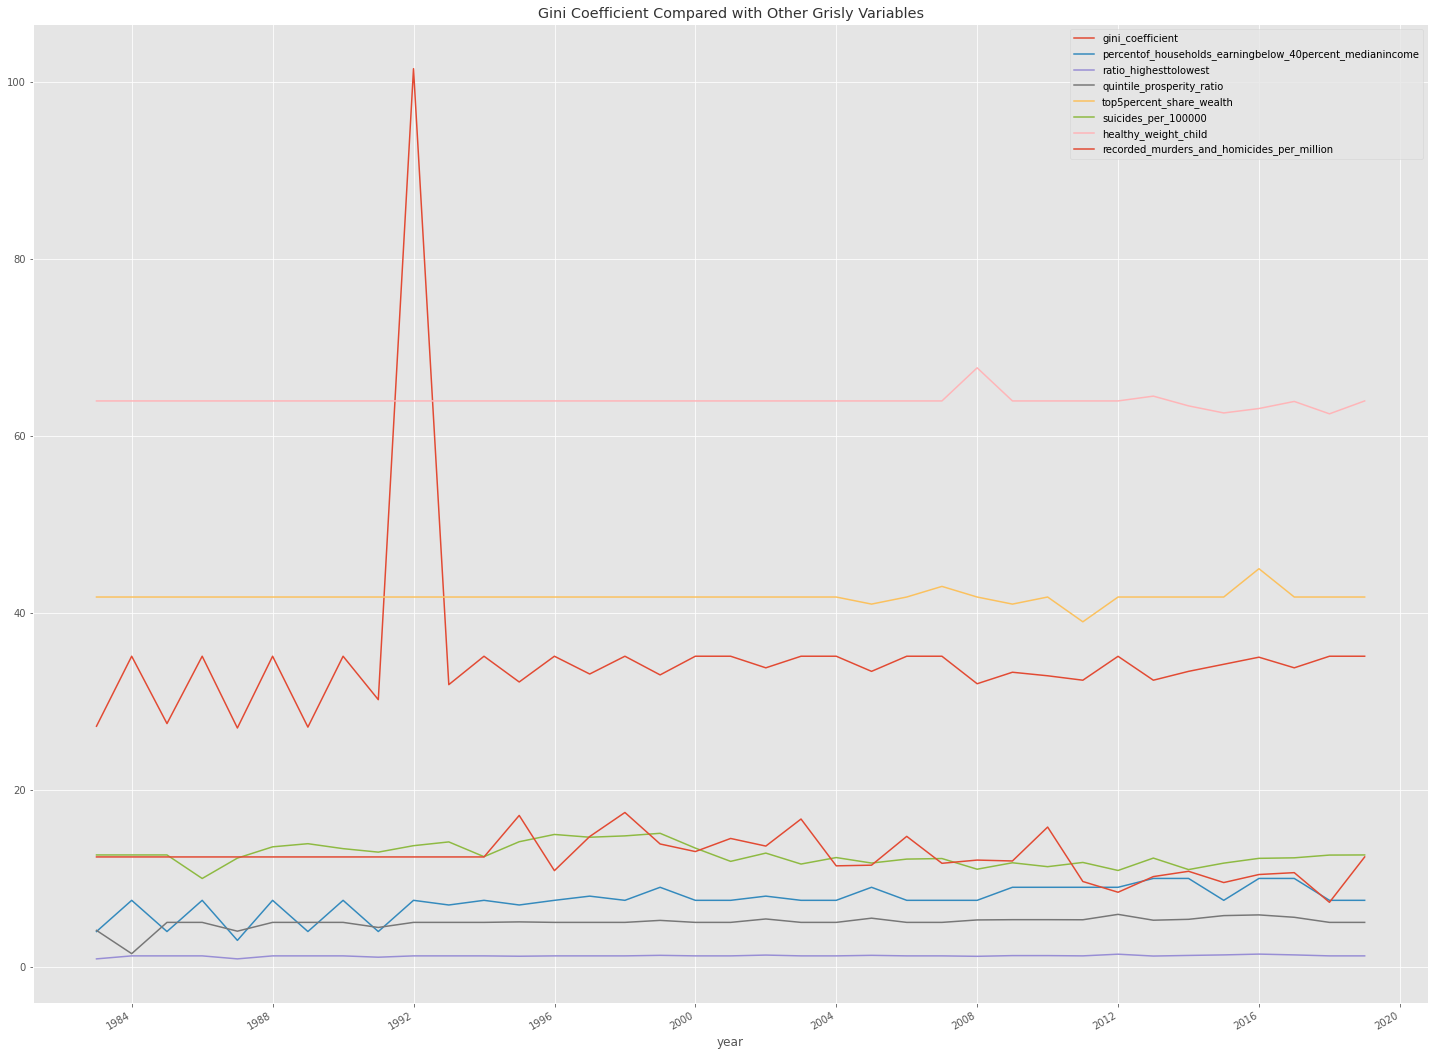

In [61]:
df_gini_percenthousebelow40 = df_mean[['gini_coefficient','percentof_households_earningbelow_40percent_medianincome','ratio_highesttolowest','quintile_prosperity_ratio','top5percent_share_wealth','suicides_per_100000','healthy_weight_child','recorded_murders_and_homicides_per_million']]
df_gini_percenthousebelow40.plot()
plot.title("Gini Coefficient Compared with Other Grisly Variables", alpha=0.8)

In [71]:
df_merged.head()

quintile_prosperity_ratio  decile_prosperity_ratio  \
1994-12-31                       5.09                     8.03   
2011-12-31                       5.94                     9.75   
2004-12-31                       5.51                     9.15   
1999-12-31                        NaN                      NaN   
2017-12-31                        NaN                      NaN   

            ratio_highesttolowest  90th_to_10th_income_ratio  \
1994-12-31                   1.21                       3.87   
2011-12-31                   1.44                       4.26   
2004-12-31                   1.31                       4.17   
1999-12-31                    NaN                        NaN   
2017-12-31                    NaN                        NaN   

            80th_to_20th_income_ratio  80th_to_50th_income_ratio  \
1994-12-31                       2.52                       1.66   
2011-12-31                       2.67                       1.64   
2004-12-31                       2.74                       1.62   
1999-12-31                        NaN                        NaN   
2017-12-31                        NaN                        NaN   

            50th_to_20th_income_ratio  gini_coefficient  \
1994-12-31                       0.66              32.2   
2011-12-31                       0.62              35.1   
2004-12-31                       0.59              33.4   
1999-12-31                        NaN               NaN   
2017-12-31                        NaN               NaN   

            top10percent_share_wealth  top5percent_share_wealth  \
1994-12-31                        NaN                       NaN   
2011-12-31                        NaN                       NaN   
2004-12-31                       55.0                      41.0   
1999-12-31                        NaN                       NaN   
2017-12-31                        NaN                       NaN   

            top1percent_share_wealth  shareofincome_lowest_deciles  \
1994-12-31                       NaN                          19.9   
2011-12-31                       NaN                          18.9   
2004-12-31                      20.0                          19.0   
1999-12-31                       NaN                          53.6   
2017-12-31                       NaN                           NaN   

            shareofincome_middle_deciles  \
1994-12-31                          54.9   
2011-12-31                          57.5   
2004-12-31                          54.6   
1999-12-31                          22.9   
2017-12-31                           NaN   

            percentofhouseholds_earningbelow_60percent_medianincome  \
1994-12-31                                               19.0         
2011-12-31                                               20.0         
2004-12-31                                               20.0         
1999-12-31                                                NaN         
2017-12-31                                                NaN         

            percentofhouseholds_earningbelow_50percent_medianincome  \
1994-12-31                                               13.0         
2011-12-31                                               14.0         
2004-12-31                                               14.0         
1999-12-31                                                NaN         
2017-12-31                                                NaN         

            percentofhouseholds_earningbelow_50percent_median2007income  \
1994-12-31                                               22.0             
2011-12-31                                               13.0             
2004-12-31                                               17.0             
1999-12-31                                                NaN             
2017-12-31                                                NaN             

            percentofhouseholds_earningbelow_60percent_median2007income 

#### Normalising the Data

Below is the data normalised. It is useful to normalise this data as it allows us to show where data is far away from its normal values. It also allows us to compare the data on the same graph. Without normalising the data the graph shows a flat line for all the ratios, and a general trend upwards for bank assets. 

Below we can see there is a fair bit of variation. Combined with other real time considerations this data is likely to reveal the impact of government policies, reserve bank settings and so on. Interestingly, the value of the banks went up the entire time, with a slight flat line around the global financial crisis. 

Another point of interest, the suicide rate went down (normalised data). This is interesting as it is counter to the narrative that suicides have increased.  

Text(0.5, 1.0, 'Gini Coefficient, Inequality Measures and Bank Income')

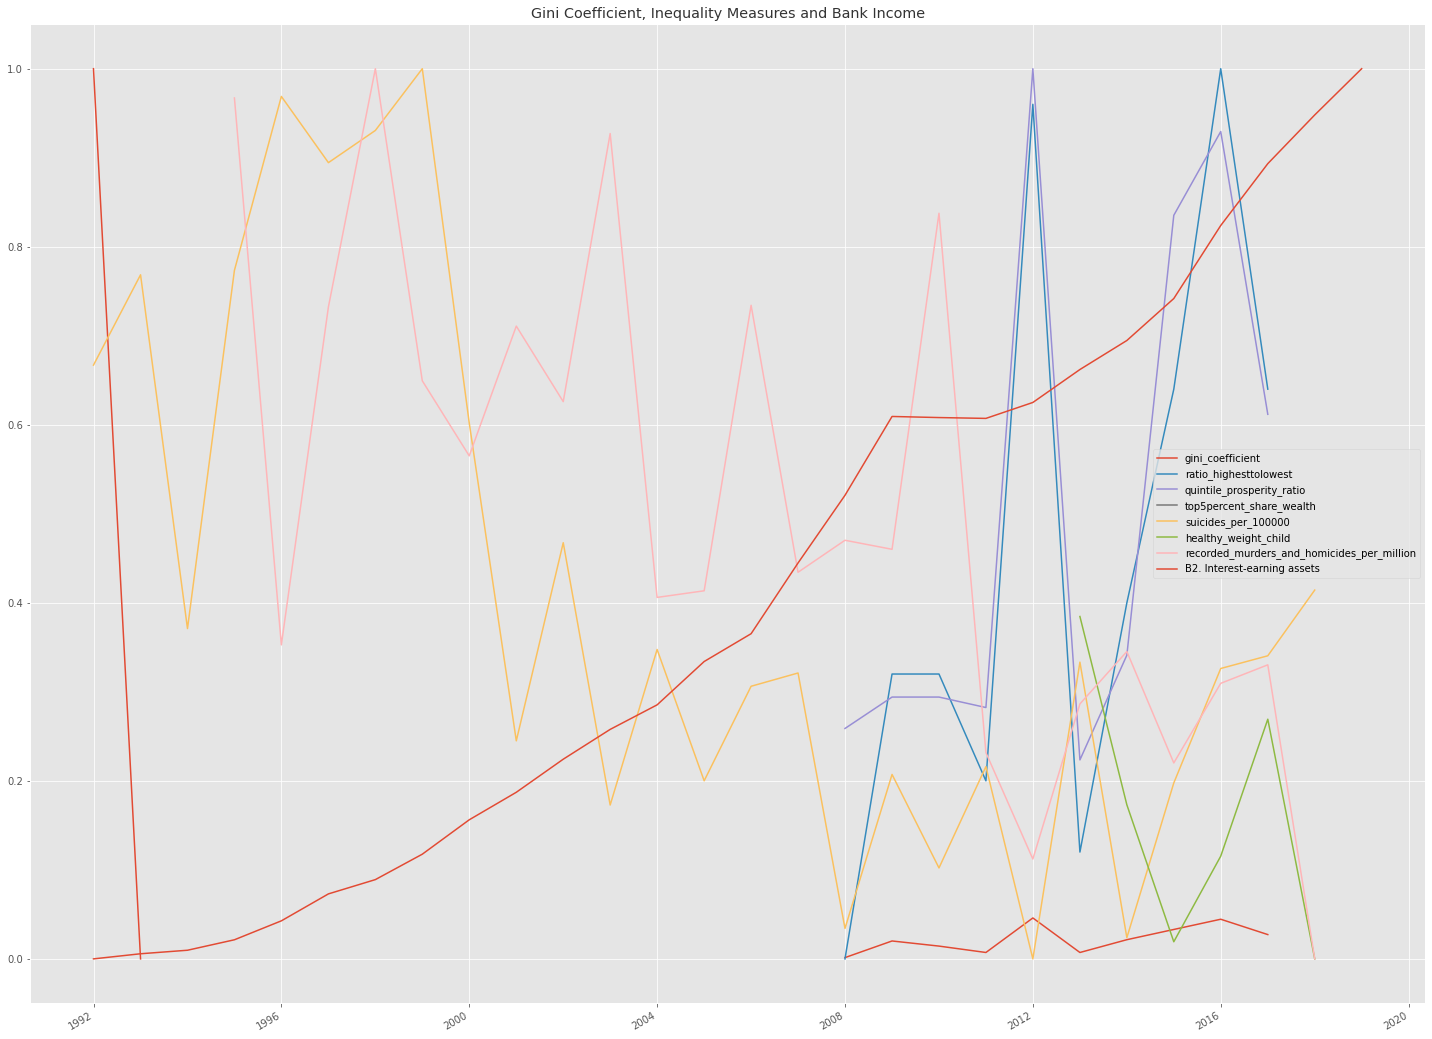

In [39]:
df_merged_graphdata = df_merged[['gini_coefficient','ratio_highesttolowest','quintile_prosperity_ratio','top5percent_share_wealth','suicides_per_100000','healthy_weight_child','recorded_murders_and_homicides_per_million','B2. Interest-earning assets']]
df_merged_graphdata = (df_merged_graphdata-df_merged_graphdata.min())/(df_merged_graphdata.max()-df_merged_graphdata.min())
df_merged_graphdata.plot()
plot.title("Normalised Gini Coefficient, Inequality Measures and Bank Income", alpha=0.8)

# Conclusion 


Eating breakfast helps enormously with regulating emotions. 

Gini coefficient has increased slightly in New Zealand over time. 

Banks have increased their equity position over time.



### Key findings:

1. The gini coeffient has increased over time. 
2. Societal variables are correlated in some way or another, however they are not reliable predictors of outcomes - they are markers. These trends are best compared over shorter periods with a view to observe the effects of interventions such as the ERA 1991 on economic markers.  
3. Banks have increased their equity position potentially at the expense of New Zealanders. Whilst they have not increased interest, which is determined by bond markets, they have increased their wealth over time. 

# Bibliography

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#:~:text=DataFrame%20is%20a%202-dimensional%20labeled%20data%20structure%20with,is%20generally%20the%20most%20commonly%20used%20pandas%20object.

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

https://www.youtube.com/watch?v=xi0vhXFPegw&t=314s

https://www.geeksforgeeks.org/how-to-show-all-columns-of-a-pandas-dataframe/

https://stackoverflow.com/questions/32401054/calling-rows-in-a-dataframe

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://www.dataquest.io/blog/jupyter-notebook-tutorial/

https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe

https://stackoverflow.com/questions/39975367/attributeerror-module-urllib-has-no-attribute-urlopen

https://docs.ckan.org/en/latest/api/index.html

https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fcatalogue.data.govt.nz%2Fdataset%2F7968f3ad-b628-42c6-9c6a-24f3da81130c%2Fresource%2Fefac9aa5-cd50-43ff-a56c-8bf8a8df9fb2%2Fdownload%2F2018-12_ham_all_data_version1.4-excel.xlsx&wdOrigin=BROWSELINK

https://catalogue.data.govt.nz/dataset/housing-affordability-measure/resource/efac9aa5-cd50-43ff-a56c-8bf8a8df9fb2

https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

https://stackoverflow.com/questions/40095712/when-to-applypd-to-numeric-and-when-to-astypenp-float64-in-python

https://plotly.com/python/table-subplots/

https://plotly.com/python/figurewidget-app/

https://stackoverflow.com/questions/20016360/trouble-with-using-iloc-in-pandas-dataframe-with-hierarchical-index

https://matplotlib.org/stable/api/widgets_api.html

https://www.rbnz.govt.nz/statistics/series/registered-banks/banks-summary-income-statement-and-related-ratios

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

https://thespinoff.co.nz/politics/15-05-2021/how-new-zealands-employment-laws-changed-forever-30-years-ago-today

https://pandashowto.com/minmaxscaler-in-pandas/#:~:text=scaler%20%3D%20MinMaxScaler%28%29%20scaler.fit%28df%29%20Once%20the%20scaler%20has,Pandas%20DataFrame%20if%20needed%3A%20scaled_df%20%3D%20pd.DataFrame%28scaled_df%2C%20columns%3Ddf.columns%29

https://datascientyst.com/normalize-column-pandas-dataframe/

